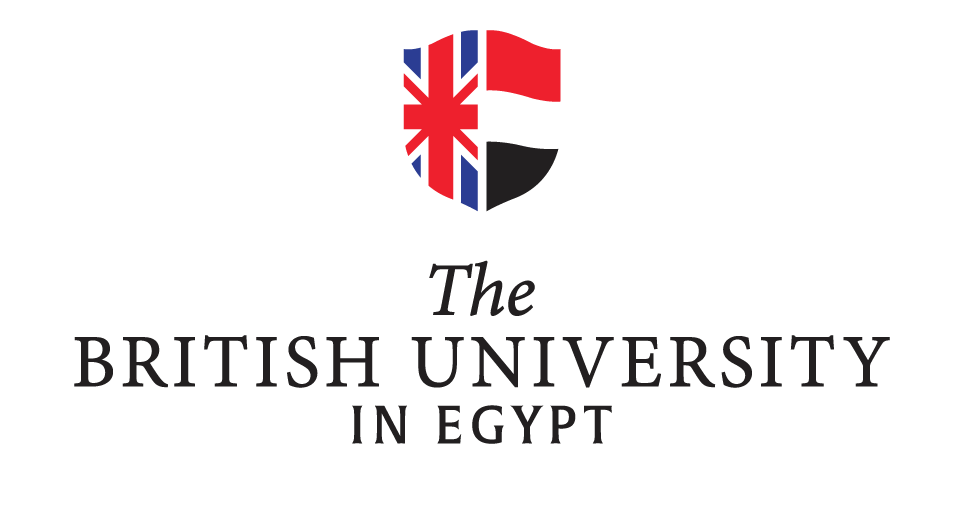


<h2 style="text-align: center;"></h2>
<h2 style="text-align: center;">Introduction to Data Science</h2>
<h2 style="text-align: center;">23CSAI01I</h2>
<h3 style="text-align: center;">Phase 3</h3>


<h2 style="text-align: center;"> Data Scientist Salary </h2>

<h2 style="text-align: center;">
Amr228074 - Loay222929 -  Sameh218767
<h3 style="text-align: center;">Group 19</h3>




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import numpy as np
import warnings
import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interactive

# Ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
df1=pd.read_csv('data_cleaned_2021.csv')
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 100
print(df1.shape)

(742, 42)


# Overview of The Dataset

**About Dataset:**
This dataset provides insights into data scientist salaries and job postings in the United States for the year 2021. It contains information on 742 unique job postings and is designed for data analysis and modeling. This dataset provides valuable data for anyone interested in data science careers, salary trends, or the skills landscape for data scientists in the US and acts as a reference point and training set to predict future changes and trends in the industry.

**Source:** https://www.kaggle.com/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor


---


In [ ]:
df1.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


# Data Preprocessing


Important Note: The following steps outline the general data cleaning of the dataset and represents only an early stage of data pre-processing. Each specific question you explore from this data may necessitate additional, tailored pre-processing steps to ensure optimal analysis.

In [ ]:
def convert_to_annual(salary):
    if pd.isna(salary):
        return None
    salary = salary.replace('$','')
    # Assume 8 hrs/day, 5 days/wk, 50 wks/yr
    salary_yearly = float(salary)*8*5*50
    return salary_yearly


In [ ]:
def extract_lower_salary(salary):
    if pd.isna(salary):
      return None
    salary_parts = salary.split("-")
    if len(salary_parts) == 2:
      upper_salary_str = salary_parts[0].strip()
    else:
      return None

    pattern = r"\$([0-9]+)"
    found_salary = re.search(pattern, upper_salary_str)

    if found_salary:
        original = found_salary.group(1).replace("$","").strip()
        salary_num = float(original)
        if 'k' in salary.lower():
            return float(salary_num*1000)
        if 'Per Hour' in salary:
            return convert_to_annual(original)
    else:
        return None

In [ ]:
def extract_upper_salary(salary):
    if pd.isna(salary):
      return None
    salary_parts = salary.split("-")
    if len(salary_parts) == 2:
      upper_salary_str = salary_parts[1].strip()
    else:
      return None

    pattern = r"\$([0-9]+)"
    found_salary = re.search(pattern, upper_salary_str)

    if found_salary:
        original = found_salary.group(1).replace("$","").strip()
        salary_num = float(original)
        if 'k' in salary.lower():
            return float(salary_num*1000)
        if 'Per Hour' in salary:
            return convert_to_annual(original)
    else:
        return None

In [ ]:
def lower_revenue(size):

  if pd.isna(size) or size=='Unknown / Non-Applicable':
    return None

  size = size.replace(' ', '')
  size = size.replace('$', '')
  range_pattern = r'\d+to\d+'
  plus_pattern = r'\+'

  found_range = re.search(range_pattern, size)
  found_plus = re.search(plus_pattern, size)
  factor = 1
  if 'million' in size:
    factor = 1000000
  if 'billion' in size:
    factor = 1000000000

  if found_range:
    bounds = size.split('to')
    return int(bounds[0].strip()) * factor
  elif found_plus:
    return int(size[:found_plus.start()]) * factor
  else:
    return 0

In [ ]:
def upper_revenue(size):

  if pd.isna(size) or size=='Unknown / Non-Applicable':
    return None

  size = size.replace(' ', '')
  size = size.replace('$', '')
  range_pattern = r'\d+to(\d+)'

  plus_pattern = r'\+'
  found_range = re.search(range_pattern, size)
  found_plus = re.search(plus_pattern, size)
  factor = 1
  if 'million' in size:
    factor = 1000000
  if 'billion' in size:
    factor = 1000000000

  if found_range:
    return int(found_range.group(1)) * factor
  elif found_plus:
    return int(size[:found_plus.start()]) * factor
  else:
    return 0

In [ ]:
def count_competitors(competitors):
  if competitors == '-1':
    return 0
  else:
    return len(competitors.split(','))

In [ ]:
def seniority_binarization(seniority):
  if seniority == 'sr':
    return 1
  else:
    return 0

In [ ]:
def lower_size(size):
  range_pattern = r'\d+ \- \d+'
  plus_pattern = r'\+'
  found_range = re.search(range_pattern, size)
  found_plus = re.search(plus_pattern, size)
  if found_range:
    bounds = size.split('-')
    return int(bounds[0].strip())
  elif found_plus:
    return size[:found_plus.start()]
  else:
    return 0

In [ ]:
def upper_size(size):
  range_pattern = r'\d+ \- \d+'
  plus_pattern = r'\+'
  found_range = re.search(range_pattern, size)
  found_plus = re.search(plus_pattern, size)
  if found_range:
    bounds = size.split('-')
    return int(bounds[1].strip())
  elif found_plus:
    return size[:found_plus.start()]
  else:
    return 0

In [ ]:
def Remove_numerical_outliers(df1,Column_name,Excluded_range):
    df1 = df1[df1[Column_name] <= Excluded_range]

In [ ]:
# General Data cleaning beginning

# Remove duplicates
df1.drop_duplicates(keep=("last"), inplace=True)

#Encoding
df1['Competitors'] = df1['Competitors'].apply(count_competitors)

# Remove negative ratings
df1 = df1[df1['Rating'] >= 0]

# Move values from company_txt to Company Name
df1.loc[:, 'Company Name'] = df1['company_txt']

# Seperate city from state
df1.insert(7, 'Job City Location', df1['Location'].str.split(',').str[0])

# Creating lower and upper revenue columns
df1['Lower Revenue'] = df1['Revenue'].apply(lower_revenue)
df1['Upper Revenue'] = df1['Revenue'].apply(upper_revenue)


# Binarization of Senriority
df1['seniority_by_title']=df1['seniority_by_title'].apply(seniority_binarization)

# Seperate Size into Lower Size and Upper Size
df1.insert(9, 'Lower Size', df1['Size'].apply(lower_size))
df1.insert(10, 'Upper Size', df1['Size'].apply(upper_size))

# Get upper and lower salaries
df1['Lower Salary'] = df1['Salary Estimate'].apply(extract_lower_salary)
df1['Upper Salary'] = df1['Salary Estimate'].apply(extract_upper_salary)

df1['Avg Salary(K)'] = (df1['Upper Salary']+df1['Lower Salary'])/2

# Drop redundant columns
df1.drop(columns=['Size','company_txt', 'Salary Estimate', 'Location','google_an', 'mongo', 'flink', 'Hourly','Revenue'], inplace=True)



df1 = df1[df1['Industry'] != '-1']
df1 = df1[df1['Founded'] != -1]

# Renaming everything to prepare for merge
df1.rename(columns={
    'tableau' : 'Tableau',
    'excel' : 'Microsoft Excel',
    'sql' : 'SQL',
    'sas' : 'SAS',
    'tensor' : 'TensorFlow',
    'bi' : 'Power BI',
    'aws' : 'AWS',
    'spark' : 'Spark',
    'Job Location':'Job State Location'
}, inplace=True)

# Dataset After Cleaning

In [ ]:
df1.head(100)

,index,Job Title,Job Description,Rating,Company Name,Job City Location,Headquarters,Lower Size,Upper Size,Founded,Type of ownership,Industry,Sector,Competitors,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Job State Location,Age,Python,Spark,AWS,Microsoft Excel,SQL,SAS,keras,pytorch,scikit,TensorFlow,hadoop,Tableau,Power BI,job_title_sim,seniority_by_title,Degree,Lower Revenue,Upper Revenue
0,0,Data Scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,Albuquerque,"Goleta, CA",501,1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,0,0,53000.0,91000.0,72000.0,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,data scientist,0,M,5.000000e+07,1.000000e+08
1,1,Healthcare Data Scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,Linthicum,"Baltimore, MD",10000,10000,1984,Other Organization,Health Care Services & Hospitals,Health Care,0,0,63000.0,112000.0,87500.0,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,0,M,2.000000e+09,5.000000e+09
2,2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,Clearwater,"Clearwater, FL",501,1000,2010,Company - Private,Security Services,Business Services,0,0,80000.0,90000.0,85000.0,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,data scientist,0,M,1.000000e+08,5.000000e+08
3,3,Data Scientist,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,Richland,"Richland, WA",1001,5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",3,0,56000.0,97000.0,76500.0,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,0,na,0.000000e+00,0.000000e+00
4,4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,New York,"New York, NY",51,200,1998,Company - Private,Advertising & Marketing,Business Services,3,0,86000.0,143000.0,114500.0,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,data scientist,0,na,NaN,NaN
5,5,Data Scientist,CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne,Dallas,"Dallas, TX",201,500,2000,Company - Public,Real Estate,Real Estate,3,0,71000.0,119000.0,95000.0,TX,21,1,0,1,1,1,0,0,0,0,0,0,0,1,data scientist,0,na,1.000000e+09,2.000000e+09
6,6,Data Scientist,Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage,Baltimore,"Baltimore, MD",501,1000,2008,Company - Private,Banks & Credit Unions,Finance,0,0,54000.0,93000.0,73500.0,MD,13,0,0,0,1,0,0,0,0,0,0,0,0,0,data scientist,0,na,NaN,NaN
7,7,Data Scientist,Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20,San Jose,"Seattle, WA",201,500,2005,Company - Private,Consulting,Business Services,0,0,86000.0,142000.0,114000.0,CA,16,1,1,1,1,1,0,0,1,0,1,0,0,0,data scientist,0,M,2.500000e+07,5.000000e+07
8,8,Research Scientist,SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health,Rochester,"Rochester, NY",10000,10000,2014,Hospital,Health Care Services & Hospitals,Health Care,0,0,38000.0,84000.0,61000.0,NY,7,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,0,P,0.000000e+00,0.000000e+00
9,9,Data Scientist,isn’t your usual company. Our work is powered ...,4.6,<intent>,New York,"New York, NY",51,200,2009,Company - Private,Internet,Information Technology,2,0,120000.0,160000.0,140000.0,NY,12,1,1,0,0,0,0,0,0,0,0,0,0,0,data scientist,0,na,1.000000e+08,5.000000e+08


# Scraped Dataset

In [ ]:
df2=pd.read_csv('glassdoor_scraped.csv')
print(df2.shape)

(1394, 15)


# Overview of The Scraped Data

**About Scraped Data:**

This data was scraped from glassdoor for the role 'data analyst' which provides isnights on data scientist salaries and job postings in the United States for as of end of April, 2024. It contains information on 1395 job postings with 15 different columns designed for data analysis and modeling.

**Source:** https://www.glassdoor.com/


---

In [ ]:
df2.head()

,index,job_title,salary_estimate,job_description,rating,company_name,location,size,founded,type_of_ownership,industry,sector,revenue,skills,company_age
0,NaN,Dir Data Science,$92K - $163K (Glassdoor est.),NaN,3.7,Southern Glazer’s Wine and Spirits,"Cerritos, CA",10000+ Employees,1968,Company - Private,Wholesale,Retail & Wholesale,$10+ billion (USD),Develop innovative data science solutions for ...,NaN
1,NaN,Power BI Developer,$5K - $7K (Employer est.),NaN,5.0,Kapital Data Corp,"Richmond, VA",NaN,NaN,NaN,NaN,NaN,NaN,Ability to travel around the state as needed. ...,NaN
2,NaN,Computer Vision / Autonomy Engineer,$122K - $204K (Employer est.),NaN,3.7,Intramotev,United States,1 to 50 Employees,--,Company - Private,--,--,Unknown / Non-Applicable,Willingness to expand into technical areas bey...,NaN
3,NaN,Departmental Specialist 13 - Rates and Encount...,$89K - $128K (Employer est.),NaN,4.3,Human Resources Developer 9 - P11 - PDB / MCOL...,"Lansing, MI",10000+ Employees,--,Government,State & Regional Agencies,Government & Public Administration,Unknown / Non-Applicable,Serves as a technical advisor and liaison in w...,NaN
4,NaN,Lead Data Analyst- Hybrid,$66K - $96K (Employer est.),NaN,3.7,ManTech,"Chantilly, VA",5001 to 10000 Employees,1968,Company - Public,Aerospace & Defense,Aerospace & Defense,$1 to $5 billion (USD),For all positions requiring access to technolo...,NaN


# Scraped Data Preprocessing

**Important Note:** Some previously used functions above will be used here, hence the cleaning will be much simpler than earlier. Some cleaning procedures will not be taken into account at this stage of the cleaning to leave room for a more flexible analysis based on the questions below.

In [ ]:
def lower_size(size):

  if pd.isna(size):
    return None

  size = size.replace(' ', '')
  range_pattern = r'\d+to\d+'
  plus_pattern = r'\+'

  found_range = re.search(range_pattern, size)
  found_plus = re.search(plus_pattern, size)

  if found_range:
    bounds = size.split('to')
    return int(bounds[0].strip())
  elif found_plus:
    return size[:found_plus.start()]
  else:
    return 0

In [ ]:
def upper_size(size):

  if pd.isna(size):
    return None

  size = size.replace(' ', '')
  range_pattern = r'\d+to(\d+)'

  plus_pattern = r'\+'
  found_range = re.search(range_pattern, size)
  found_plus = re.search(plus_pattern, size)

  if found_range:
    return int(found_range.group(1))
  elif found_plus:
    return size[:found_plus.start()]
  else:
    return 0

In [ ]:
def extract_state(text):
  if pd.isna(text):
    return None
  parts = text.split(",", 1)
  if len(parts) > 1:
    return parts[1].strip()  # Remove leading/trailing whitespaces
  else:
    return text

In [ ]:
# General cleaning of the scraped data

# Removing white spaces
df2.rename(columns=lambda x: x.strip(), inplace=True)

# Creating company age column
df2['founded'] = pd.to_numeric(df2['founded'], errors='coerce')
df2['company_age'] = 2024 - df2['founded']
df2.head()

# Creating lower and upper size columns
df2['Lower Size'] = df2['size'].apply(lower_size)
df2['Upper Size'] = df2['size'].apply(upper_size)
df2.head()

# Creating lower and upper revenue columns
df2['Lower Revenue'] = df2['revenue'].apply(lower_revenue)
df2['Upper Revenue'] = df2['revenue'].apply(upper_revenue)
df2.head()

# Get upper and lower salaries
df2['Lower Salary'] = df2['salary_estimate'].apply(extract_lower_salary)
df2['Upper Salary'] = df2['salary_estimate'].apply(extract_upper_salary)

# Change Salary data type
df2['Avg Salary(K)'] = (df2['Upper Salary']+df2['Lower Salary'])/2

# Seperate city from state
df2.insert(7, 'Job City Location', df2['location'].str.split(',').str[0])

# Dropping unnecessary columns
df2 = df2.drop(columns=['job_description', 'index', 'salary_estimate','size','revenue'], axis=1)

# Location
df2['Job State Location'] = df2['location'].apply(extract_state)

# Renaming everything to prepare for merge
df2.rename(columns={
    'job_title' : 'Job Title',
    'rating' : 'Rating',
    'company_name' : 'Company Name',
    'location' : 'Headquarters',
    'founded' : 'Founded',
    'type_of_ownership' : 'Type of ownership',
    'industry' : 'Industry',
    'sector' : 'Sector',
    'company_age' : 'Age',
}, inplace=True)

In [ ]:
df2.head()

,Job Title,Rating,Company Name,Headquarters,Job City Location,Founded,Type of ownership,Industry,Sector,skills,Age,Lower Size,Upper Size,Lower Revenue,Upper Revenue,Lower Salary,Upper Salary,Avg Salary(K),Job State Location
0,Dir Data Science,3.7,Southern Glazer’s Wine and Spirits,"Cerritos, CA",Cerritos,1968.0,Company - Private,Wholesale,Retail & Wholesale,Develop innovative data science solutions for ...,56.0,10000,10000,1.000000e+10,1.000000e+10,92000.0,163000.0,127500.0,CA
1,Power BI Developer,5.0,Kapital Data Corp,"Richmond, VA",Richmond,NaN,NaN,NaN,NaN,Ability to travel around the state as needed. ...,NaN,None,None,NaN,NaN,5000.0,7000.0,6000.0,VA
2,Computer Vision / Autonomy Engineer,3.7,Intramotev,United States,United States,NaN,Company - Private,--,--,Willingness to expand into technical areas bey...,NaN,1,50,NaN,NaN,122000.0,204000.0,163000.0,United States
3,Departmental Specialist 13 - Rates and Encount...,4.3,Human Resources Developer 9 - P11 - PDB / MCOL...,"Lansing, MI",Lansing,NaN,Government,State & Regional Agencies,Government & Public Administration,Serves as a technical advisor and liaison in w...,NaN,10000,10000,NaN,NaN,89000.0,128000.0,108500.0,MI
4,Lead Data Analyst- Hybrid,3.7,ManTech,"Chantilly, VA",Chantilly,1968.0,Company - Public,Aerospace & Defense,Aerospace & Defense,For all positions requiring access to technolo...,56.0,5001,10000,1.000000e+09,5.000000e+09,66000.0,96000.0,81000.0,VA


We begin extracting the skills from the skills column and perform binarizationn on the top 50 most common skills

In [ ]:

skills = set()

for desc in df2['skills']:
    try:
        desc_skills = desc.split('Skills: ')
    except:
        continue
    desc_skills = desc_skills[-1].split(', ')
    skills.update(desc_skills)


skills_dict = {}
for skill in skills:
    skills_dict[skill] = 0

for desc in df2['skills']:
    try:
        desc_skills = desc.split('Skills: ')
    except:
        continue
    desc_skills = desc_skills[-1].split(', ')
    for skill in desc_skills:
        skills_dict[skill] +=1

skills_df_count = pd.DataFrame(list(skills_dict.items()), columns=['skills', 'count'])
skills_df_count.sort_values(by="count", ascending=False).reset_index().head(10)

,index,skills,count
0,299,Microsoft Excel,438
1,513,Power BI,297
2,483,SQL,257
3,216,R,206
4,79,Analysis skills,198
5,209,Management,186
6,87,Microsoft Powerpoint,162
7,367,Data analysis skills,160
8,315,Computer science,152
9,235,Tableau,151


Expanding the 'skills' column so that we have the top 50 skill columns

In [ ]:
skills_top50 = skills_df_count.sort_values(by="count", ascending=False).head(50);
skills_df = pd.DataFrame(0, index=df2.index, columns=skills_top50['skills'].tolist())

for i, desc in enumerate(df2['skills']):
    desc_skills = desc.split('Skills: ')[-1].split(', ')
    desc_skills = [x for x in desc_skills if x in skills_top50['skills'].tolist()]
    skills_df.loc[i, desc_skills] = 1

skills_df.head()

,Microsoft Excel,Power BI,SQL,R,Analysis skills,Management,Microsoft Powerpoint,Data analysis skills,Computer science,Tableau,SAS,Machine learning,Microsoft Word,Data mining,Statistics,Communication skills,TensorFlow,Oracle,Microsoft Office,Business intelligence,Azure,Data modeling,Research,Project management,Writing skills,Business analysis,Microsoft Access,Data science,Relational databases,Big data,Data structures,Jira,AI,Organizational skills,Customer service,Spark,AWS,CI/CD,Microsoft SQL Server,Statistical software,MATLAB,Databases,Leadership,English,Microsoft Outlook,Computer skills,Git,Sales,Java,Statistical analysis
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


We now proceed to concatenate the scraped dataset along with the extracted skills dataframe

In [ ]:
df2 = pd.concat([df2, skills_df], axis=1)
df2.head(100)

,Job Title,Rating,Company Name,Headquarters,Job City Location,Founded,Type of ownership,Industry,Sector,skills,Age,Lower Size,Upper Size,Lower Revenue,Upper Revenue,Lower Salary,Upper Salary,Avg Salary(K),Job State Location,Microsoft Excel,Power BI,SQL,R,Analysis skills,Management,Microsoft Powerpoint,Data analysis skills,Computer science,Tableau,SAS,Machine learning,Microsoft Word,Data mining,Statistics,Communication skills,TensorFlow,Oracle,Microsoft Office,Business intelligence,Azure,Data modeling,Research,Project management,Writing skills,Business analysis,Microsoft Access,Data science,Relational databases,Big data,Data structures,Jira,AI,Organizational skills,Customer service,Spark,AWS,CI/CD,Microsoft SQL Server,Statistical software,MATLAB,Databases,Leadership,English,Microsoft Outlook,Computer skills,Git,Sales,Java,Statistical analysis
0,Dir Data Science,3.7,Southern Glazer’s Wine and Spirits,"Cerritos, CA",Cerritos,1968.0,Company - Private,Wholesale,Retail & Wholesale,Develop innovative data science solutions for ...,56.0,10000,10000,1.000000e+10,1.000000e+10,92000.0,163000.0,127500.0,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Power BI Developer,5.0,Kapital Data Corp,"Richmond, VA",Richmond,NaN,NaN,NaN,NaN,Ability to travel around the state as needed. ...,NaN,None,None,NaN,NaN,5000.0,7000.0,6000.0,VA,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Computer Vision / Autonomy Engineer,3.7,Intramotev,United States,United States,NaN,Company - Private,--,--,Willingness to expand into technical areas bey...,NaN,1,50,NaN,NaN,122000.0,204000.0,163000.0,United States,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,Departmental Specialist 13 - Rates and Encount...,4.3,Human Resources Developer 9 - P11 - PDB / MCOL...,"Lansing, MI",Lansing,NaN,Government,State & Regional Agencies,Government & Public Administration,Serves as a technical advisor and liaison in w...,NaN,10000,10000,NaN,NaN,89000.0,128000.0,108500.0,MI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Lead Data Analyst- Hybrid,3.7,ManTech,"Chantilly, VA",Chantilly,1968.0,Company - Public,Aerospace & Defense,Aerospace & Defense,For all positions requiring access to technolo...,56.0,5001,10000,1.000000e+09,5.000000e+09,66000.0,96000.0,81000.0,VA,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,State Administrative Manager 15 - Vital Record...,3.7,Laborer 5-E6 (Non-career),"Lansing, MI",Lansing,NaN,Government,State & Regional Agencies,Government & Public Administration,Help preserve and protect our environment and ...,NaN,10000,10000,NaN,NaN,100000.0,125000.0,112500.0,MI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,"Statistician Specialist 13, Statistical Suppor...",4.3,Fire Safety Officer 6-E7,"Lansing, MI",Lansing,NaN,Government,State & Regional Agencies,Government & Public Administration,Help preserve and protect our environment and ...,NaN,10000,10000,NaN,NaN,80000.0,118000.0,99000.0,MI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Senior ML Ops Data Engineer,3.8,SportsBiz,Remote,Remote,NaN,NaN,NaN,NaN,"Bachelor’s or Master’s degree in Data Science,...",NaN,None,None,NaN,NaN,89000.0,116000.0,102500.0,Remote,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,Engineer III - Laboratory IT,3.7,Novo Nordisk,"Lexington, MA",Lexington,1923.0,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,Major tasks will include implementing and main...,101.0,10000,10000,1.000000e+10,1.000000e+10,86000.0,143000.0,114500.0,MA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,"Healthc

In [ ]:
skills_top50.head(10)

,skills,count
299,Microsoft Excel,438
513,Power BI,297
483,SQL,257
216,R,206
79,Analysis skills,198
209,Management,186
87,Microsoft Powerpoint,162
367,Data analysis skills,160
315,Computer science,152
235,Tableau,151


# Integrate Both Datasets

After both datasets have been meticulously preprocessed to eliminate inconsistencies and reformat the data in legible manner, we can confidently proceed to the integration stage.

In [ ]:
df1.columns

Index(['index', 'Job Title', 'Job Description', 'Rating', 'Company Name',
       'Job City Location', 'Headquarters', 'Lower Size', 'Upper Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Competitors',
       'Employer provided', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)',
       'Job State Location', 'Age', 'Python', 'Spark', 'AWS',
       'Microsoft Excel', 'SQL', 'SAS', 'keras', 'pytorch', 'scikit',
       'TensorFlow', 'hadoop', 'Tableau', 'Power BI', 'job_title_sim',
       'seniority_by_title', 'Degree', 'Lower Revenue', 'Upper Revenue'],
      dtype='object')

In [ ]:
common_columns = [
    "Job Title",
    "Rating",
    "Company Name",
    "Headquarters",
    "Job City Location",
    "Job State Location",
    "Founded",
    "Type of ownership",
    "Industry",
    "Sector",
    "Age",
    "Lower Salary",
    "Upper Salary",
    "Lower Size",
    "Upper Size",
    "Lower Revenue",
    "Upper Revenue",
    "Avg Salary(K)",
    "Tableau",
    "Microsoft Excel",
    "SQL",
    "SAS",
    "TensorFlow",
    "Power BI",
    "AWS",
    "Spark",
]

df = pd.merge(left=df1, right=df2, on=common_columns, how='outer')
df.shape

(2084, 81)

In [ ]:
df.columns

Index(['index', 'Job Title', 'Job Description', 'Rating', 'Company Name',
       'Job City Location', 'Headquarters', 'Lower Size', 'Upper Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Competitors',
       'Employer provided', 'Lower Salary', 'Upper Salary', 'Avg Salary(K)',
       'Job State Location', 'Age', 'Python', 'Spark', 'AWS',
       'Microsoft Excel', 'SQL', 'SAS', 'keras', 'pytorch', 'scikit',
       'TensorFlow', 'hadoop', 'Tableau', 'Power BI', 'job_title_sim',
       'seniority_by_title', 'Degree', 'Lower Revenue', 'Upper Revenue',
       'skills', 'R', 'Analysis skills', 'Management', 'Microsoft Powerpoint',
       'Data analysis skills', 'Computer science', 'Machine learning',
       'Microsoft Word', 'Data mining', 'Statistics', 'Communication skills',
       'Oracle', 'Microsoft Office', 'Business intelligence', 'Azure',
       'Data modeling', 'Research', 'Project management', 'Writing skills',
       'Business analysis', 'Microsoft Access', 'D

We lastly remove all the columns found in the original dataset but not in the scraped data to minimize the existence of null columns

In [ ]:
df.drop(columns=['seniority_by_title','Competitors','Employer provided','Job Description','Degree','job_title_sim','skills','index'], inplace=True)
df.drop_duplicates(keep=("last"), inplace=True)

In [ ]:
column_names = [
    "R", "Analysis skills", "Management", "Microsoft Powerpoint",
    "Data analysis skills", "Computer science", "Machine learning",
    "Microsoft Word", "Data mining", "Statistics", "Communication skills",
    "Oracle", "Microsoft Office", "Business intelligence", "Azure",
    "Data modeling", "Research", "Project management", "Writing skills",
    "Business analysis", "Microsoft Access", "Data science", "Relational databases",
    "Big data", "Data structures", "Jira", "AI", "Organizational skills",
    "Customer service", "CI/CD", "Microsoft SQL Server", "Statistical software",
    "Databases", "MATLAB", "Leadership", "English", "Sales", "Computer skills",
    "Microsoft Outlook", "Git", "Java", "Statistical analysis"
]
for col in column_names:
    df[col] = df[col].fillna(0)

In [ ]:
df.head(20)

,Job Title,Rating,Company Name,Job City Location,Headquarters,Lower Size,Upper Size,Founded,Type of ownership,Industry,Sector,Lower Salary,Upper Salary,Avg Salary(K),Job State Location,Age,Python,Spark,AWS,Microsoft Excel,SQL,SAS,keras,pytorch,scikit,TensorFlow,hadoop,Tableau,Power BI,Lower Revenue,Upper Revenue,R,Analysis skills,Management,Microsoft Powerpoint,Data analysis skills,Computer science,Machine learning,Microsoft Word,Data mining,Statistics,Communication skills,Oracle,Microsoft Office,Business intelligence,Azure,Data modeling,Research,Project management,Writing skills,Business analysis,Microsoft Access,Data science,Relational databases,Big data,Data structures,Jira,AI,Organizational skills,Customer service,CI/CD,Microsoft SQL Server,Statistical software,MATLAB,Databases,Leadership,English,Microsoft Outlook,Computer skills,Git,Sales,Java,Statistical analysis
0,Data Scientist,3.8,Tecolote Research,Albuquerque,"Goleta, CA",501,1000,1973.0,Company - Private,Aerospace & Defense,Aerospace & Defense,53000.0,91000.0,72000.0,NM,48.0,1.0,0,0,1,0,1,0.0,0.0,0.0,0,0.0,1,1,5.000000e+07,1.000000e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Healthcare Data Scientist,3.4,University of Maryland Medical System,Linthicum,"Baltimore, MD",10000,10000,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,63000.0,112000.0,87500.0,MD,37.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0,2.000000e+09,5.000000e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Data Scientist,4.8,KnowBe4,Clearwater,"Clearwater, FL",501,1000,2010.0,Company - Private,Security Services,Business Services,80000.0,90000.0,85000.0,FL,11.0,1.0,1,0,1,1,1,0.0,0.0,0.0,0,0.0,0,0,1.000000e+08,5.000000e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Data Scientist,3.8,PNNL,Richland,"Richland, WA",1001,5000,1965.0,Government,Energy,"Oil, Gas, Energy & Utilities",56000.0,97000.0,76500.0,WA,56.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Data Scientist,2.9,Affinity Solutions,New York,"New York, NY",51,200,1998.0,Company - Private,Advertising & Marketing,Business Services,86000.0,143000.0,114500.0,NY,23.0,1.0,0,0,1,1,1,0.0,0.0,0.0,0,0.0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Data Scientist,3.4,CyrusOne,Dallas,"Dallas, TX",201,500,2000.0,Company - Public,Real Estate,Real Estate,71000.0,119000.0,95000.0,TX,21.0,1.0,0,1,1,1,0,0.0,0.0,0.0,0,0.0,0,1,1.000000e+09,2.000000e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Data Scientist,4.1,ClearOne Advantage,Baltimore,"Baltimore, MD",501,1000,2008.0,Company - Private,Banks & Credit Unions,Finance,54000.0,93000.0,73500.0,MD,13.0,0.0,0,0,1,0,0,0.0,0.0,0.0,0,0.0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,Data Scientist,3.8,Logic20/20,San Jose,"Seattle, WA",201,500,2005.0,Company - Private,Consulting,Business Services,86000.0,142000.0,114000.0,CA,16.0,1.0,1,1,1,1,0,0.0,1.0,0.0,1,0.0,0,0,2.500000e+07,5.000000e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

# General Visualization

Before we get down to numbers, let's visualize the data. Charts and graphs will act as our compass, revealing hidden trends and relationships and pave the way for deeper insights into these job markets as we go further on.




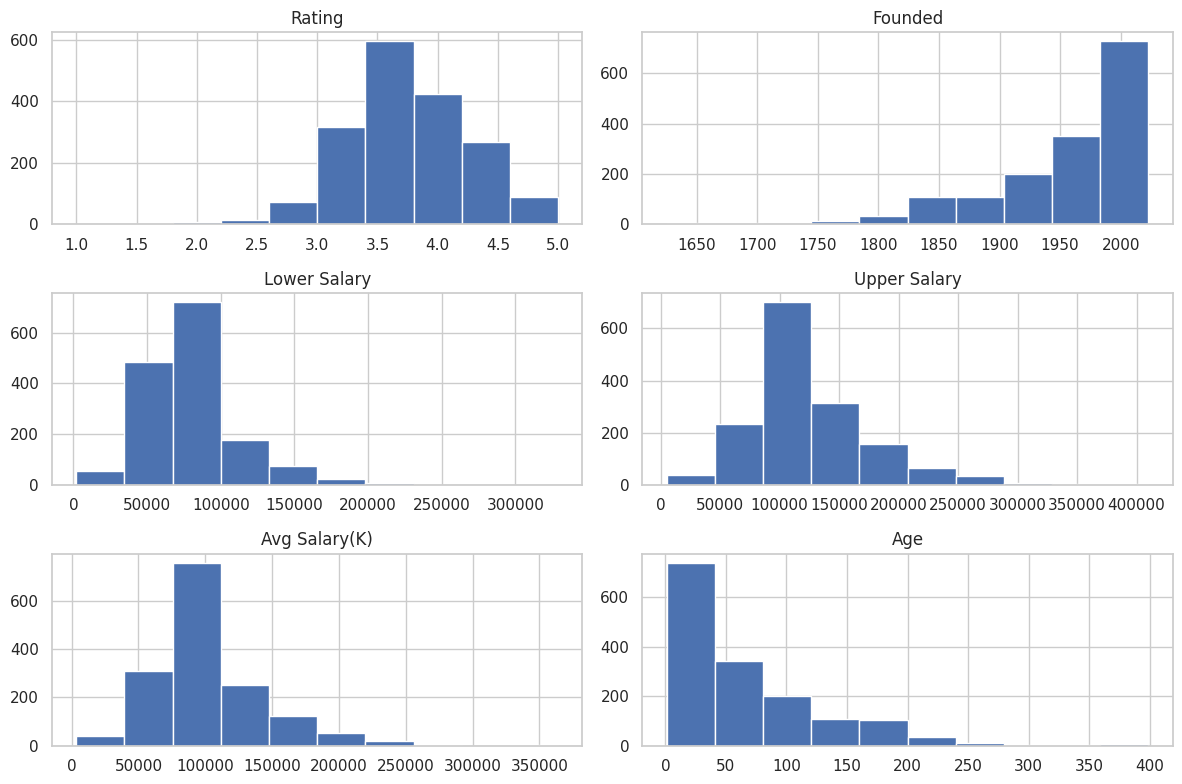

In [ ]:

numerical_cols = ['Rating', 'Lower Size', 'Upper Size', 'Founded',
                  'Lower Salary', 'Upper Salary', 'Avg Salary(K)', 'Age']
df[numerical_cols].hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

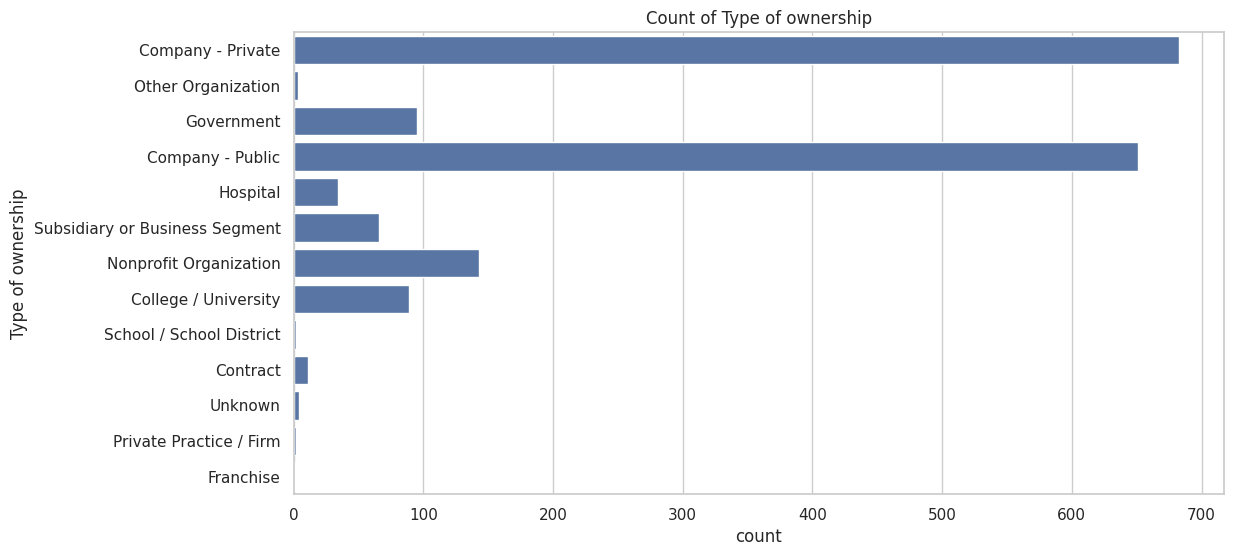

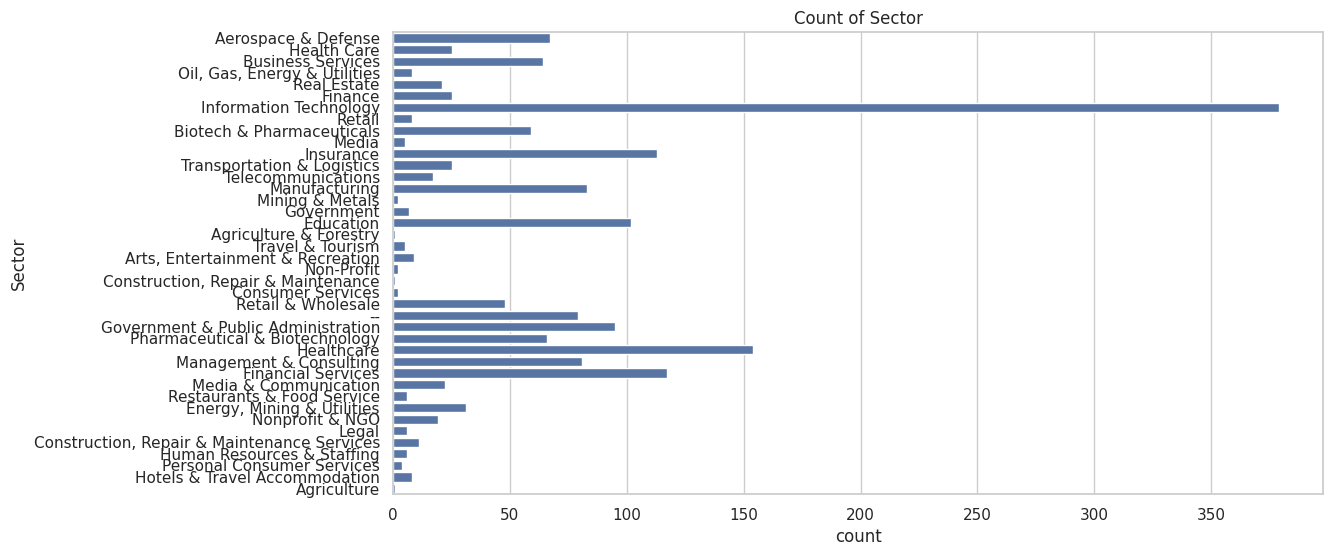

In [ ]:
# Bar Plots
categorical_cols = [ 'Type of ownership', 'Sector']
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, y=col)
    plt.title(f'Count of {col}')
    plt.show()

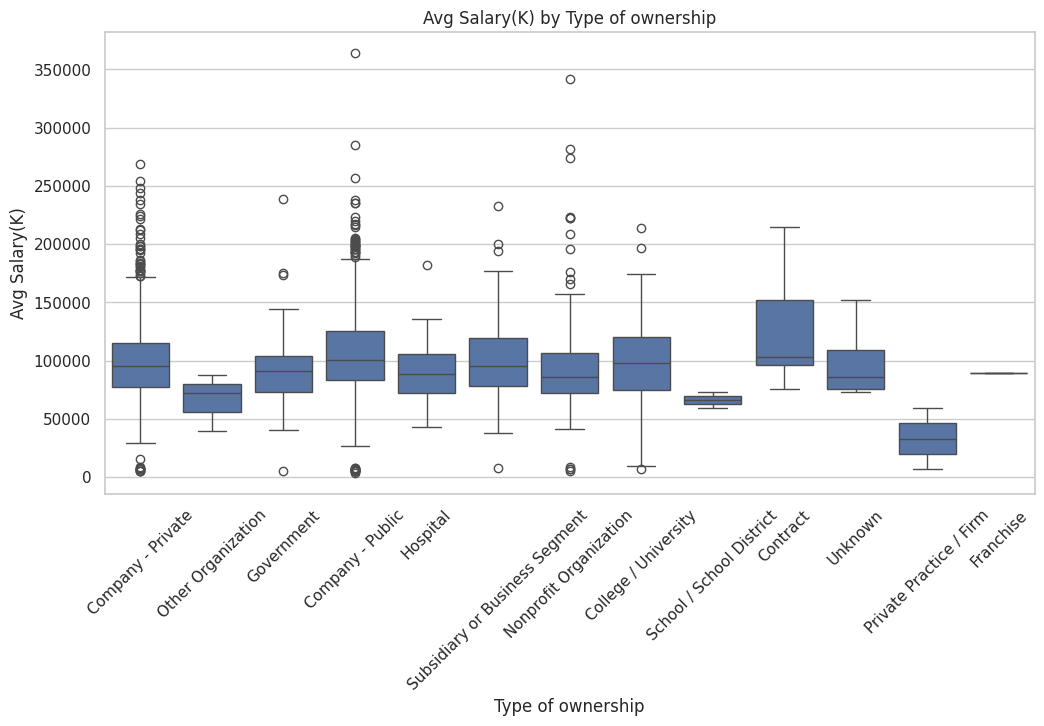

In [ ]:

for col in ['Type of ownership']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x=col, y='Avg Salary(K)')
    plt.title(f'Avg Salary(K) by {col}')
    plt.xticks(rotation=45)
    plt.show()

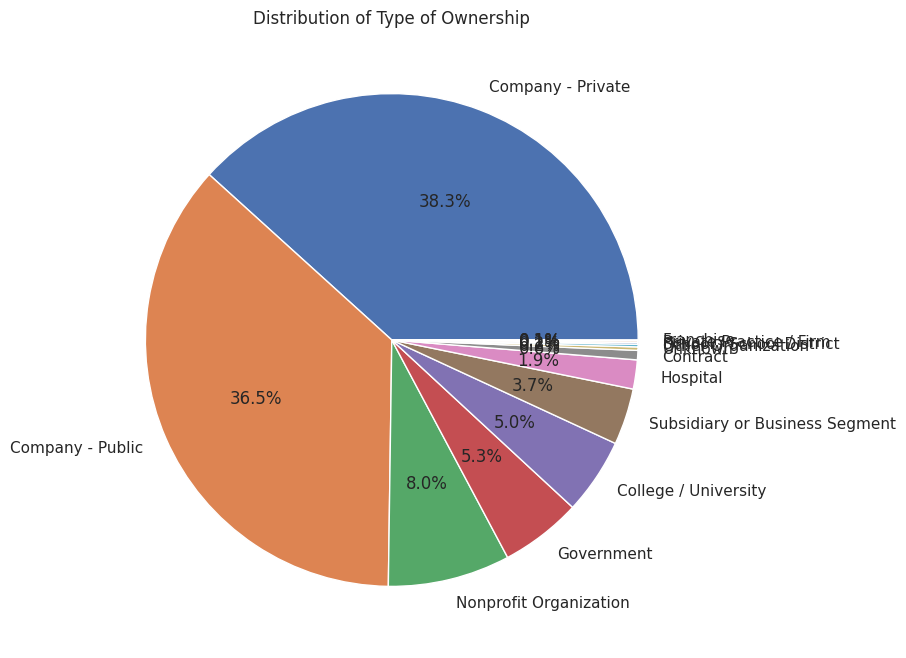

In [ ]:
# Pie Charts
plt.figure(figsize=(10, 8))
df['Type of ownership'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Type of Ownership')
plt.ylabel('')
plt.show()


Now that we have established what we are working with and how it may yield useful insights, it is about time we dive deep into extracting insights from the given dataset.


---



# Amr228074 Work

### Q9 How does the distribution of the highest 20 average salaries vary across different industries and sectors and how this can affect companies rating in these industries?

#### Columns used: (Industry, Sector, Avg Salary(K), Rating )

In [ ]:
df.columns

Index(['Job Title', 'Rating', 'Company Name', 'Job City Location',
       'Headquarters', 'Lower Size', 'Upper Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Lower Salary',
       'Upper Salary', 'Avg Salary(K)', 'Job State Location', 'Age', 'Python',
       'Spark', 'AWS', 'Microsoft Excel', 'SQL', 'SAS', 'keras', 'pytorch',
       'scikit', 'TensorFlow', 'hadoop', 'Tableau', 'Power BI',
       'Lower Revenue', 'Upper Revenue', 'R', 'Analysis skills', 'Management',
       'Microsoft Powerpoint', 'Data analysis skills', 'Computer science',
       'Machine learning', 'Microsoft Word', 'Data mining', 'Statistics',
       'Communication skills', 'Oracle', 'Microsoft Office',
       'Business intelligence', 'Azure', 'Data modeling', 'Research',
       'Project management', 'Writing skills', 'Business analysis',
       'Microsoft Access', 'Data science', 'Relational databases', 'Big data',
       'Data structures', 'Jira', 'AI', 'Organizational skills',
       'Custome

#### First I need to group Indeustries and Sectors with theirs Average Salaries

In [ ]:
average_salary_by_industry_sector = df.groupby(['Industry', 'Sector'])['Avg Salary(K)'].mean().reset_index()
average_salary_by_industry_sector

,Industry,Sector,Avg Salary(K)
0,--,--,112963.235294
1,Accounting & Tax,Financial Services,95125.000000
2,Advertising & Marketing,Business Services,100722.222222
3,Advertising & Public Relations,Media & Communication,80562.500000
4,Aerospace & Defense,Aerospace & Defense,105745.614035
...,...,...,...
128,Video Game Publishing,Media & Communication,96500.000000
129,Video Games,Media,102750.000000
130,Waste Management,Management & Consulting,68500.000000
131,Wholesale,Business Services,103166.666667


#### Now we need put our focus on the highest 20 Industries in terms of average salaries

In [ ]:
average_salary_by_industry_sector_sorted = average_salary_by_industry_sector.sort_values(by='Avg Salary(K)', ascending=False)
top_20_averages = average_salary_by_industry_sector_sorted.head(20)
top_20_averages ## so now top_20_averages has the highest 20 Industries in terms of average salaries

,Industry,Sector,Avg Salary(K)
95,Other Retail Stores,Retail,163500.000000
92,Motion Picture Production & Distribution,Media,146000.000000
54,Financial Analytics & Research,Finance,138250.000000
112,Sports & Recreation,"Arts, Entertainment & Recreation",137833.333333
26,Civic & Social Services,Nonprofit & NGO,131333.333333
19,Brokerage Services,Finance,129000.000000
8,Auctions & Galleries,Retail,128000.000000
30,Computer Hardware Development,Information Technology,127706.521739
132,Wholesale,Retail & Wholesale,127500.000000
120,Telecommunications Services,Telecommunications,125125.000000


#### Now I need to visualize the the highest 20 Industries in terms of average salaries with there sectors

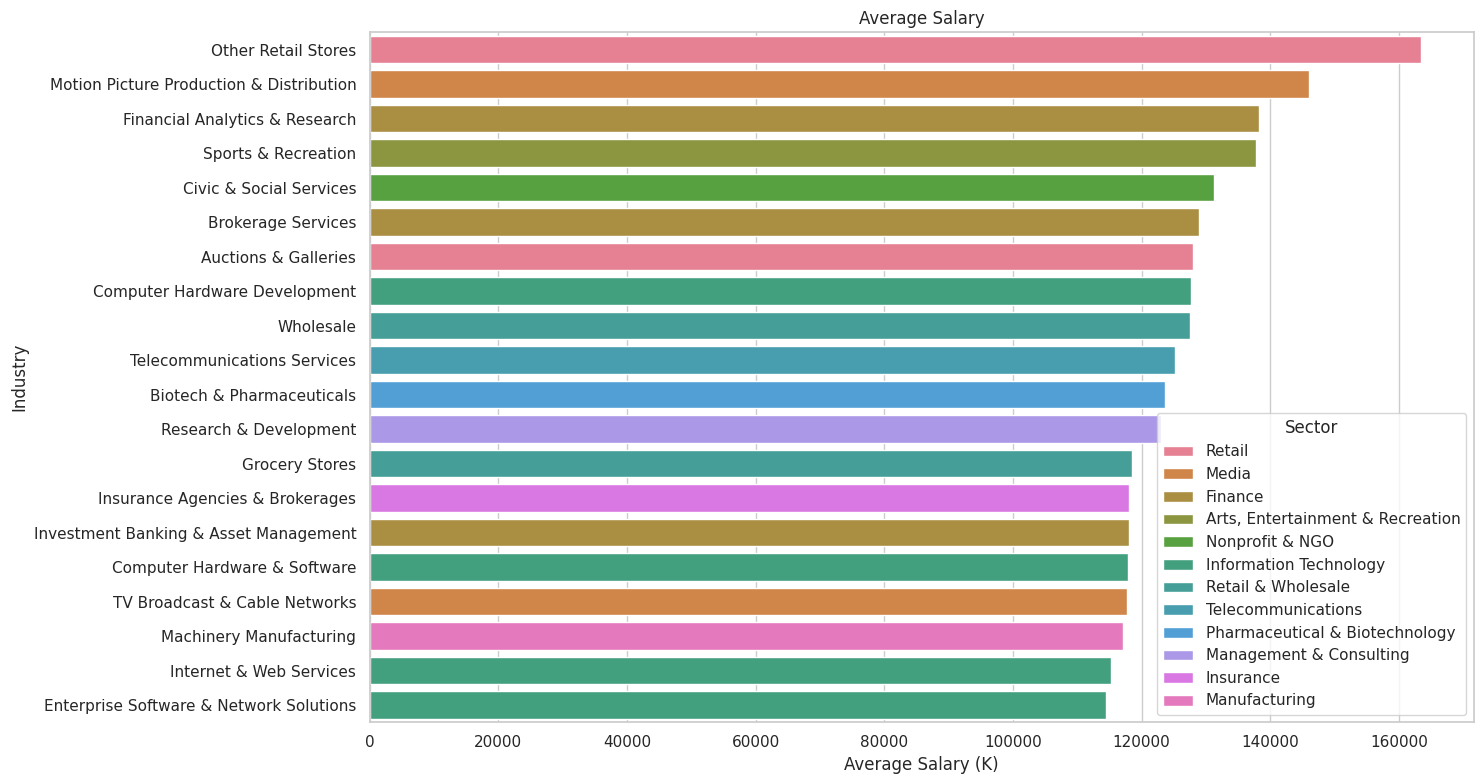

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
sns.barplot(data=top_20_averages, x='Avg Salary(K)', y='Industry', hue='Sector', dodge=False)

plt.title('Average Salary')
plt.xlabel('Average Salary (K)')
plt.ylabel('Industry')

plt.legend(title='Sector')
plt.tight_layout()
plt.show()


#### We Can Conclude from the previous bar plot that the Retail sector has the highest Average salaries equal to 163,000, and also by focusing on blue bars we can also conclude that most of the industies in Retail sector has high average salaries,

#### Next we need to check the Average companies rating for these industries.

In [ ]:
_Industries_wiht_Highest_Average_Salaries=top_20_averages['Industry']
_Industries_wiht_Highest_Average_Salaries

95                          Other Retail Stores
92     Motion Picture Production & Distribution
54               Financial Analytics & Research
112                         Sports & Recreation
26                      Civic & Social Services
19                           Brokerage Services
8                          Auctions & Galleries
30                Computer Hardware Development
132                                   Wholesale
120                 Telecommunications Services
16                    Biotech & Pharmaceuticals
103                      Research & Development
64                               Grocery Stores
75              Insurance Agencies & Brokerages
80        Investment Banking & Asset Management
29                 Computer Hardware & Software
117               TV Broadcast & Cable Networks
87                      Machinery Manufacturing
78                      Internet & Web Services
50      Enterprise Software & Network Solutions
Name: Industry, dtype: object

#### Now I need to group Industry with corrisponding average Rating.

In [ ]:
_Industries_wiht_Highest_Average_Salaries_With_their_ratings = df.groupby(['Industry'])['Rating'].mean().reset_index()
_Industries_wiht_Highest_Average_Salaries_With_their_ratings

,Industry,Rating
0,--,3.785897
1,Accounting & Tax,3.283333
2,Advertising & Marketing,3.522222
3,Advertising & Public Relations,3.837500
4,Aerospace & Defense,3.880303
...,...,...
116,Vehicle Repair & Maintenance,4.100000
117,Video Game Publishing,3.666667
118,Video Games,3.100000
119,Waste Management,4.400000


#### from the prviouse data frame we need to get the target highest 20 Industries in terms of average salaries.

In [ ]:
## now I need to iterate over data frame that has the industries with average rating to get the highest 20
## industies in terms of Average Salaries using .isin function that check on '_Industries_wiht_Highest_Average_Salaries' list
Target = _Industries_wiht_Highest_Average_Salaries_With_their_ratings[_Industries_wiht_Highest_Average_Salaries_With_their_ratings['Industry'].isin(_Industries_wiht_Highest_Average_Salaries)]
Target=Target.sort_values(by='Rating',ascending=False)
Target

,Industry,Rating
26,Computer Hardware & Software,4.100000
102,Sports & Recreation,4.050000
49,Financial Analytics & Research,3.900000
109,Telecommunications Services,3.866667
71,Internet & Web Services,3.855738
45,Enterprise Software & Network Solutions,3.819048
23,Civic & Social Services,3.812500
27,Computer Hardware Development,3.741379
94,Research & Development,3.740000
120,Wholesale,3.740000


#### Visualize the previous grouped data that shows the Industry with corrisponding average Rating.

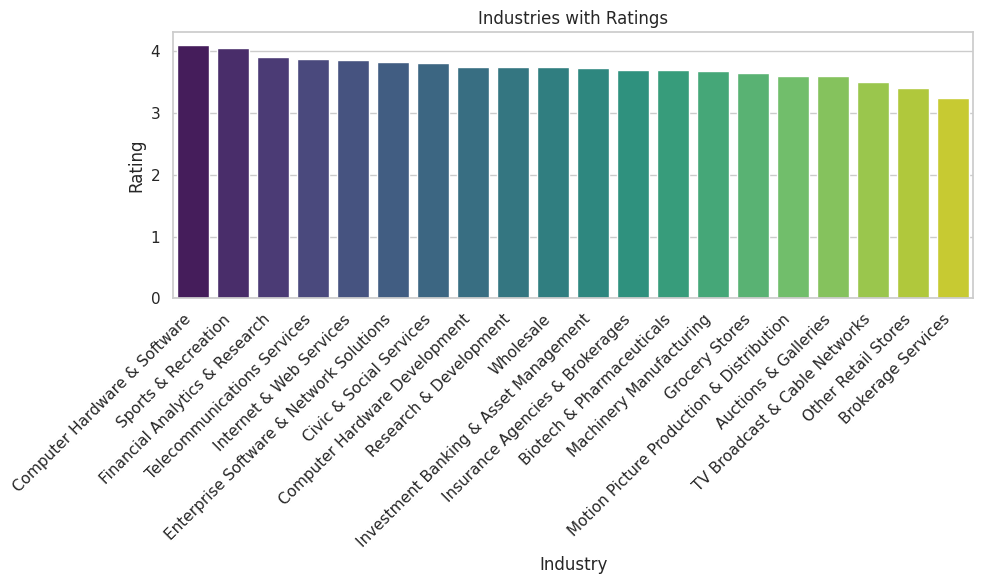

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(data=Target, x='Industry', y='Rating', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Industry')
plt.ylabel('Rating')
plt.title('Industries with Ratings')

plt.tight_layout()
plt.show()


#### From this Visualization we can notice that Computer Hardware & Software has the highest Average Rating compering to other Industries, with Rating value = 4.10

In [ ]:
Top_5_Industries_wiht_Highest_Average_Salaries_With_their_ratings = df.groupby(['Industry','Avg Salary(K)'])['Rating'].mean().reset_index()
Top_5_Industries_wiht_Highest_Average_Salaries_With_their_ratings.sort_values('Avg Salary(K)',ascending=False)

,Industry,Avg Salary(K),Rating
1255,Software Development,364000.0,4.4
830,Health Care Services & Hospitals,342000.0,3.6
296,Biotech & Pharmaceuticals,285000.0,4.2
1224,Research & Development,282000.0,3.8
358,Civic & Social Services,273500.0,3.4
...,...,...,...
1137,Municipal Agencies,5000.0,3.8
689,Food & Beverage Manufacturing,5000.0,3.0
350,Catering & Food Service Contractors,5000.0,3.8
213,Biotech & Pharmaceuticals,5000.0,3.8


#### Now we need to Putting all things together in other words build a data frame that contains the average rating with the average salary for each industry and sector.


In [ ]:
average_salary_by_industry_sector_and_avg_Rating = df.groupby(['Industry', 'Sector'])[['Rating', 'Avg Salary(K)']].mean().reset_index()
average_salary_by_industry_sector_and_avg_Rating=average_salary_by_industry_sector_and_avg_Rating.sort_values('Avg Salary(K)',ascending=False)
average_salary_by_industry_sector_and_avg_Rating=average_salary_by_industry_sector_and_avg_Rating.head(20)
average_salary_by_industry_sector_and_avg_Rating

,Industry,Sector,Rating,Avg Salary(K)
95,Other Retail Stores,Retail,3.500000,163500.000000
92,Motion Picture Production & Distribution,Media,3.600000,146000.000000
54,Financial Analytics & Research,Finance,3.900000,138250.000000
112,Sports & Recreation,"Arts, Entertainment & Recreation",4.050000,137833.333333
26,Civic & Social Services,Nonprofit & NGO,3.812500,131333.333333
19,Brokerage Services,Finance,3.250000,129000.000000
8,Auctions & Galleries,Retail,3.600000,128000.000000
30,Computer Hardware Development,Information Technology,3.741379,127706.521739
132,Wholesale,Retail & Wholesale,3.950000,127500.000000
120,Telecommunications Services,Telecommunications,3.866667,125125.000000


#### Visualize this grouped data that contains average rating with the average salary for each industry and sector using scatter.

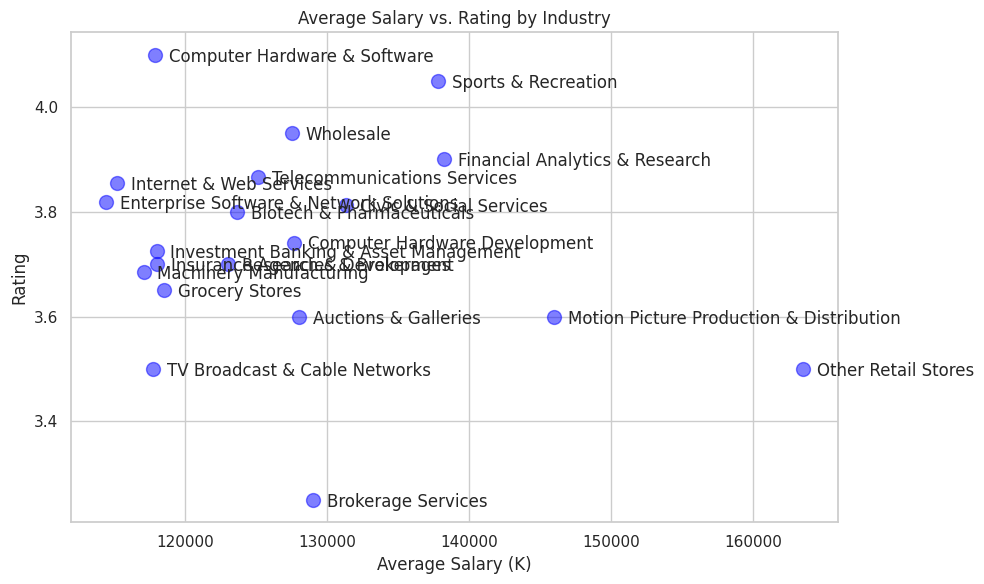

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(average_salary_by_industry_sector_and_avg_Rating['Avg Salary(K)'],
            average_salary_by_industry_sector_and_avg_Rating['Rating'],
            s=100, c='blue', alpha=0.5)

plt.title('Average Salary vs. Rating by Industry')
plt.xlabel('Average Salary (K)')
plt.ylabel('Rating')

## using .annotate method to visualize industry name in scatter
for i, txt in enumerate(average_salary_by_industry_sector_and_avg_Rating['Industry']):
    plt.annotate(txt, (average_salary_by_industry_sector_and_avg_Rating['Avg Salary(K)'].iloc[i],
                       average_salary_by_industry_sector_and_avg_Rating['Rating'].iloc[i]),
                 xytext=(10,-5), textcoords='offset points')

plt.tight_layout()
plt.show()


#### From this Scatter we can notice that there are industries have high Average Raiting with high Averge salary such as Motion Picture Production & Distribution and Financial Analytics & Research.
#### On the other side we have industies that have low Average Rating with low Average salary such as Brokerage Services

------

### Q10 Can We Identify if there are particular areas known for offering higher salaries and more opportunities (Jobs) compared to others for job titles related to data science fields?

Columns would be used: (Job Title,  Job City Location, Avg Salary(K) )

In [ ]:
df.columns ## Check dataset's columns

Index(['Job Title', 'Rating', 'Company Name', 'Job City Location',
       'Headquarters', 'Lower Size', 'Upper Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Lower Salary',
       'Upper Salary', 'Avg Salary(K)', 'Job State Location', 'Age', 'Python',
       'Spark', 'AWS', 'Microsoft Excel', 'SQL', 'SAS', 'keras', 'pytorch',
       'scikit', 'TensorFlow', 'hadoop', 'Tableau', 'Power BI',
       'Lower Revenue', 'Upper Revenue', 'R', 'Analysis skills', 'Management',
       'Microsoft Powerpoint', 'Data analysis skills', 'Computer science',
       'Machine learning', 'Microsoft Word', 'Data mining', 'Statistics',
       'Communication skills', 'Oracle', 'Microsoft Office',
       'Business intelligence', 'Azure', 'Data modeling', 'Research',
       'Project management', 'Writing skills', 'Business analysis',
       'Microsoft Access', 'Data science', 'Relational databases', 'Big data',
       'Data structures', 'Jira', 'AI', 'Organizational skills',
       'Custome

#### First I need to filter the data frame to have only jobs related to Data Science Field, such as Data Analysis and Data Visualization.

#### To Do this I will Search in Job Title Column for Job Titiles that contain 'data' word  whatever the case of it is.

In [ ]:
Data_Scientists_df = df[df['Job Title'].str.contains('data', case=False)]

In [ ]:
Data_Scientists_df

,Job Title,Rating,Company Name,Job City Location,Headquarters,Lower Size,Upper Size,Founded,Type of ownership,Industry,Sector,Lower Salary,Upper Salary,Avg Salary(K),Job State Location,Age,Python,Spark,AWS,Microsoft Excel,SQL,SAS,keras,pytorch,scikit,TensorFlow,hadoop,Tableau,Power BI,Lower Revenue,Upper Revenue,R,Analysis skills,Management,Microsoft Powerpoint,Data analysis skills,Computer science,Machine learning,Microsoft Word,Data mining,Statistics,Communication skills,Oracle,Microsoft Office,Business intelligence,Azure,Data modeling,Research,Project management,Writing skills,Business analysis,Microsoft Access,Data science,Relational databases,Big data,Data structures,Jira,AI,Organizational skills,Customer service,CI/CD,Microsoft SQL Server,Statistical software,MATLAB,Databases,Leadership,English,Microsoft Outlook,Computer skills,Git,Sales,Java,Statistical analysis
0,Data Scientist,3.8,Tecolote Research,Albuquerque,"Goleta, CA",501,1000,1973.0,Company - Private,Aerospace & Defense,Aerospace & Defense,53000.0,91000.0,72000.0,NM,48.0,1.0,0,0,1,0,1,0.0,0.0,0.0,0,0.0,1,1,5.000000e+07,1.000000e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Healthcare Data Scientist,3.4,University of Maryland Medical System,Linthicum,"Baltimore, MD",10000,10000,1984.0,Other Organization,Health Care Services & Hospitals,Health Care,63000.0,112000.0,87500.0,MD,37.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0,2.000000e+09,5.000000e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Data Scientist,4.8,KnowBe4,Clearwater,"Clearwater, FL",501,1000,2010.0,Company - Private,Security Services,Business Services,80000.0,90000.0,85000.0,FL,11.0,1.0,1,0,1,1,1,0.0,0.0,0.0,0,0.0,0,0,1.000000e+08,5.000000e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Data Scientist,3.8,PNNL,Richland,"Richland, WA",1001,5000,1965.0,Government,Energy,"Oil, Gas, Energy & Utilities",56000.0,97000.0,76500.0,WA,56.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Data Scientist,2.9,Affinity Solutions,New York,"New York, NY",51,200,1998.0,Company - Private,Advertising & Marketing,Business Services,86000.0,143000.0,114500.0,NY,23.0,1.0,0,0,1,1,1,0.0,0.0,0.0,0,0.0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,Healthcare Data Analyst II (Hybrid - Boston),3.2,University of Massachusetts Medical School,Boston,"Boston, MA",10000,10000,1863.0,College / University,Colleges & Universities,Education,NaN,NaN,NaN,MA,161.0,NaN,0,0,1,0,1,NaN,NaN,NaN,0,NaN,0,0,1.000000e+09,5.000000e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2065,Fully Remote Lead Data Analyst / Senior Data A...,3.5,InfiniSource Consulting Solutions,United States,United States,51,200,NaN,Company - Public,National Agencies,Government & Public Administration,NaN,NaN,NaN,United States,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,0,NaN,0,0,5.000000e+06,2.500000e+07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

#### Now I have data frame called Data_Scientists_df that contains only jobs related to Data Science Field

In [ ]:
## Select 'Job Title','Job City Location' column form Data_Scientists_df data frame
Data_Scientists_df_for_City_location_and_job_title=Data_Scientists_df[['Job Title','Job City Location']]

#### Now because I have Data_Scientists_df that contains only data related to the Data Science Field, I will count which city Location has the highest demand for Data Science related fields.

In [ ]:
Data_Science_jobs_with_locations=Data_Scientists_df_for_City_location_and_job_title.groupby('Job City Location').count()

In [ ]:
Data_Science_jobs_with_locations.rename(columns={'Job Title':'Data Science Job Titles Counter'},inplace=True)
Data_Science_jobs_with_locations

,Data Science Job Titles Counter
Job City Location,
Adelphi,1
Agoura Hills,1
Alameda,1
Albany,6
Albuquerque,3
...,...
Woburn,1
Woodbridge,1
Woonsocket,1


#### Sort the groubed data

In [ ]:
Data_Science_jobs_with_locations=Data_Science_jobs_with_locations.sort_values('Data Science Job Titles Counter',ascending=False)
Data_Science_jobs_with_locations

,Data Science Job Titles Counter
Job City Location,
New York,51
United States,49
Remote,47
Chicago,35
Boston,32
...,...
Kentucky,1
Knoxville,1
Lake Forest,1


#### Store the highest 20 cities in terms of jobs related to Data Science Field.

In [ ]:
highest_20_Data_Science_jobs_with_locations=Data_Science_jobs_with_locations.head(20)

In [ ]:
Cities=highest_20_Data_Science_jobs_with_locations.index

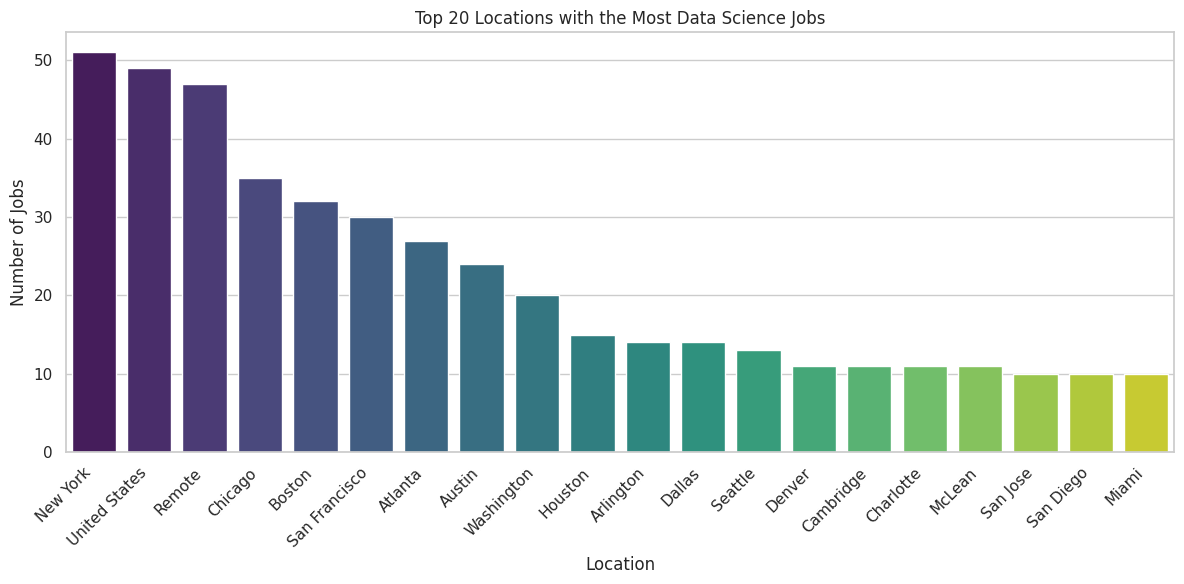

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=Cities, y='Data Science Job Titles Counter', data=highest_20_Data_Science_jobs_with_locations, palette='viridis')
plt.title('Top 20 Locations with the Most Data Science Jobs')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### From this bar plot we can notice that the highest demand for job titles related to the Data Science Field is in the USA (United States Of America) because the highest demand is in New York after this comes United States and in the fourth place comes Chicago, so form the top 5 Location they are 4 Locations in USA  


In [ ]:
### Store these cities in a list.
Top_20_Cities_in_terms_of_number_of_Data_Science_Domains=highest_20_Data_Science_jobs_with_locations.index
Top_20_Cities_in_terms_of_number_of_Data_Science_Domains

Index(['New York', 'United States', 'Remote', 'Chicago', 'Boston',
       'San Francisco', 'Atlanta', 'Austin', 'Washington', 'Houston',
       'Arlington', 'Dallas', 'Seattle', 'Denver', 'Cambridge', 'Charlotte',
       'McLean', 'San Jose', 'San Diego', 'Miami'],
      dtype='object', name='Job City Location')

#### Now I need to create new data frame of only these cities that all exist in 'Top_20_Cities_in_terms_of_number_of_Data_Science_Domains' list

In [ ]:
Data_Frame_of_Top_20_Cities_in_terms_of_number_of_Data_Science_Domains_= Data_Scientists_df[Data_Scientists_df_for_City_location_and_job_title['Job City Location'].isin(Top_20_Cities_in_terms_of_number_of_Data_Science_Domains)]
Data_Frame_of_Top_20_Cities_in_terms_of_number_of_Data_Science_Domains_

,Job Title,Rating,Company Name,Job City Location,Headquarters,Lower Size,Upper Size,Founded,Type of ownership,Industry,Sector,Lower Salary,Upper Salary,Avg Salary(K),Job State Location,Age,Python,Spark,AWS,Microsoft Excel,SQL,SAS,keras,pytorch,scikit,TensorFlow,hadoop,Tableau,Power BI,Lower Revenue,Upper Revenue,R,Analysis skills,Management,Microsoft Powerpoint,Data analysis skills,Computer science,Machine learning,Microsoft Word,Data mining,Statistics,Communication skills,Oracle,Microsoft Office,Business intelligence,Azure,Data modeling,Research,Project management,Writing skills,Business analysis,Microsoft Access,Data science,Relational databases,Big data,Data structures,Jira,AI,Organizational skills,Customer service,CI/CD,Microsoft SQL Server,Statistical software,MATLAB,Databases,Leadership,English,Microsoft Outlook,Computer skills,Git,Sales,Java,Statistical analysis
6,Data Scientist,2.9,Affinity Solutions,New York,"New York, NY",51,200,1998.0,Company - Private,Advertising & Marketing,Business Services,86000.0,143000.0,114500.0,NY,23.0,1.0,0,0,1,1,1,0.0,0.0,0.0,0,0.0,0,0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Data Scientist,3.4,CyrusOne,Dallas,"Dallas, TX",201,500,2000.0,Company - Public,Real Estate,Real Estate,71000.0,119000.0,95000.0,TX,21.0,1.0,0,1,1,1,0,0.0,0.0,0.0,0,0.0,0,1,1.000000e+09,2.000000e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,Data Scientist,3.8,Logic20/20,San Jose,"Seattle, WA",201,500,2005.0,Company - Private,Consulting,Business Services,86000.0,142000.0,114000.0,CA,16.0,1.0,1,1,1,1,0,0.0,1.0,0.0,1,0.0,0,0,2.500000e+07,5.000000e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,Data Scientist,4.6,<intent>,New York,"New York, NY",51,200,2009.0,Company - Private,Internet,Information Technology,120000.0,160000.0,140000.0,NY,12.0,1.0,1,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0,1.000000e+08,5.000000e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,Data Scientist,3.5,Wish,San Jose,"San Francisco, CA",501,1000,2011.0,Company - Private,Other Retail Stores,Retail,126000.0,201000.0,163500.0,CA,10.0,1.0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0,1.000000e+09,2.000000e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,"Associate, Data Analytics Engineering",3.7,"Avant, LLC",Chicago,"Chicago, IL",501,1000,2012.0,Company - Private,Banking & Lending,Financial Services,NaN,NaN,NaN,IL,12.0,NaN,0,0,0,0,0,NaN,NaN,NaN,0,NaN,0,0,NaN,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2053,Conflict Data Analyst II,3.4,Akima,United States,United States,5001,10000,2003.0,Company - Private,Aerospace & Defense,Aerospace & Defense,NaN,NaN,NaN,United States,21.0,NaN,0,0,1,0,0,NaN,NaN,NaN,0,NaN,1,0,1.000000e+09,5.000000e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2058,Healthcare Data Analyst II (Hybrid - Boston),3.2,University of Massachusetts Medical School,Boston,"Boston, MA",10000,10000,

#### Grouping 'Job City Location' with 'Avg Salary(K)' column to find out the average salaries among 'Job City Location' and 'Job Title'.

In [ ]:
Cities_with_average_salaries=Data_Frame_of_Top_20_Cities_in_terms_of_number_of_Data_Science_Domains_.groupby('Job City Location')[['Avg Salary(K)']].mean()

In [ ]:
Cities_with_average_salaries['Avg Salary(K)'] = Cities_with_average_salaries['Avg Salary(K)'].round(2)
## this to make the values has only two numbers only after the comma.
Cities_with_average_salaries = Cities_with_average_salaries.sort_values(by='Avg Salary(K)', ascending=False)

In [ ]:
# Now I will focus only on the top 15 Location cities.
Cities_with_average_salaries=Cities_with_average_salaries[:16]
Cities_with_average_salaries

,Avg Salary(K)
Job City Location,
San Jose,142250.00
San Francisco,128650.00
San Diego,120000.00
Washington,117285.71
McLean,113500.00
Cambridge,110863.64
Chicago,109900.00
Houston,106892.86
Charlotte,106318.18


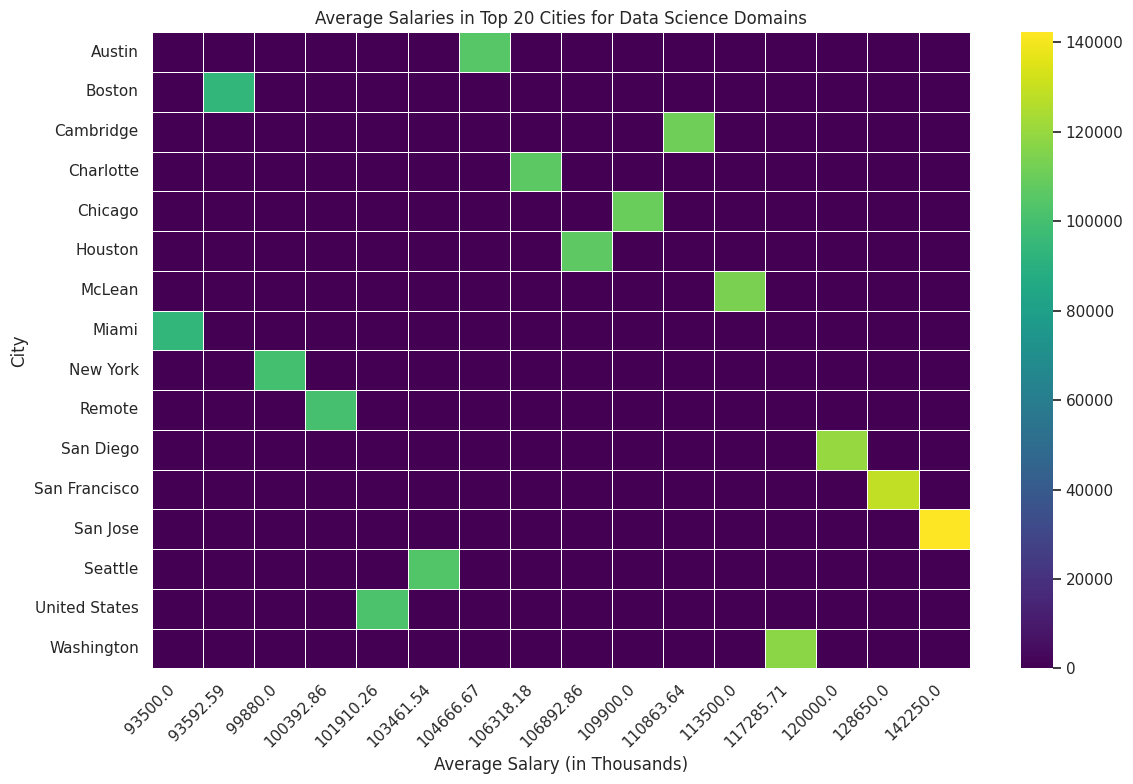

In [ ]:
pivot_table = Cities_with_average_salaries.reset_index().pivot(index='Job City Location', columns='Avg Salary(K)', values='Avg Salary(K)').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', linewidths=.5)
plt.title('Average Salaries in Top 20 Cities for Data Science Domains')
plt.xlabel('Average Salary (in Thousands)')
plt.ylabel('City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


 From this heat map, we can notice that the top city in terms of average salaries is  San Jose with the average salary for jobs related to the Data Science Field = 142,250 US dollars per year after this comes San Francisco, San Diego, Washington, and McLean respectively. We notice that all top 5 cities for jobs related to the Data Science Field are inside the USA. Also from the bar blot that I visualized before the heat map, we can notice that the highest demand for data related data science domains is in New York after this comes United States and in the fourth place comes Chicago, so form the top 5 Location they are 4 Locations in USA. from all these insights we can `conclude` that the USA is the best environment for anyone want to get job-related to Data Science Field.

# Loay222929 Work

how does the age of the company correlate to the number of skills they required? and does it relate to the salary? in data science fields
* how does the number of skills required affect the salary given? does it affect it at all?
* how does the age of the company affect the salary given?
* how does age affect the number of skills required?

taking all rows with data science rols

In [ ]:
data_science_jobs = df['Job Title'].str.contains(r'data scien', case=False)
data_science_jobs = df[data_science_jobs]
data_science_jobs.shape

(356, 73)

taking the skills and summing them to get the number of skills required

In [ ]:
df_skills = data_science_jobs.iloc[:, 17:].drop(['Lower Revenue', 'Upper Revenue'], axis='columns').fillna(0)
df_skills.head()

,Spark,AWS,Microsoft Excel,SQL,SAS,keras,pytorch,scikit,TensorFlow,hadoop,Tableau,Power BI,R,Analysis skills,Management,Microsoft Powerpoint,Data analysis skills,Computer science,Machine learning,Microsoft Word,Data mining,Statistics,Communication skills,Oracle,Microsoft Office,Business intelligence,Azure,Data modeling,Research,Project management,Writing skills,Business analysis,Microsoft Access,Data science,Relational databases,Big data,Data structures,Jira,AI,Organizational skills,Customer service,CI/CD,Microsoft SQL Server,Statistical software,MATLAB,Databases,Leadership,English,Microsoft Outlook,Computer skills,Git,Sales,Java,Statistical analysis
0,0,0,1,0,1,0.0,0.0,0.0,0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,1,1,1,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0,1,1,1,0.0,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(df_skills.sum(axis=1).unique())
df_skills.sum(axis=1)

[4. 0. 3. 1. 6. 2. 8. 7. 5.]


0       4.0
1       0.0
3       4.0
5       0.0
6       3.0
       ... 
1658    3.0
1896    2.0
1916    2.0
1923    5.0
2083    5.0
Length: 356, dtype: float64

focusing on the columns that we will focus on age, avg salary, required skills num.

In [ ]:
df_q13 = data_science_jobs[['Company Name', 'Age', 'Avg Salary(K)']]
df_q13['Required Skills Num'] = df_skills.sum(axis=1)
print(df_q13.shape)
df_q13.head()

(356, 4)


,Company Name,Age,Avg Salary(K),Required Skills Num
0,Tecolote Research,48.0,72000.0,4.0
1,University of Maryland Medical System,37.0,87500.0,0.0
3,KnowBe4,11.0,85000.0,4.0
5,PNNL,56.0,76500.0,0.0
6,Affinity Solutions,23.0,114500.0,3.0


making sure that all the rows aren't less then 0

In [ ]:
print(df_q13[df_q13['Age'] < 0].size)
print(df_q13[df_q13['Avg Salary(K)'] < 0].size)
print(df_q13[df_q13['Required Skills Num'] < 0].size)

0
0
0


In [ ]:
df_q13 = df_q13.drop(df_q13[df_q13['Required Skills Num'] == 0].index)
print(df_q13.shape)
df_q13.head()

(331, 4)


,Company Name,Age,Avg Salary(K),Required Skills Num
0,Tecolote Research,48.0,72000.0,4.0
3,KnowBe4,11.0,85000.0,4.0
6,Affinity Solutions,23.0,114500.0,3.0
8,CyrusOne,21.0,95000.0,4.0
10,ClearOne Advantage,13.0,73500.0,1.0


In [ ]:
print(df_q13['Age'].isna().sum())
print(df_q13['Avg Salary(K)'].isna().sum())
print(df_q13['Company Name'].isna().sum())

24
42
0


In [ ]:
df_q13 = df_q13.dropna()
df_q13.shape

(270, 4)

In [ ]:
df_q13.iloc[:, 1:].corr()

,Age,Avg Salary(K),Required Skills Num
Age,1.000000,-0.034641,-0.103102
Avg Salary(K),-0.034641,1.000000,-0.018953
Required Skills Num,-0.103102,-0.018953,1.000000


1. negligible negative correlation between Avg Salary, and age of -0.03
2. weak negative correlation between number of required skills number, and company age of -0.10
3. negligible positive correlation between number of required skills number, and salary of 0.018

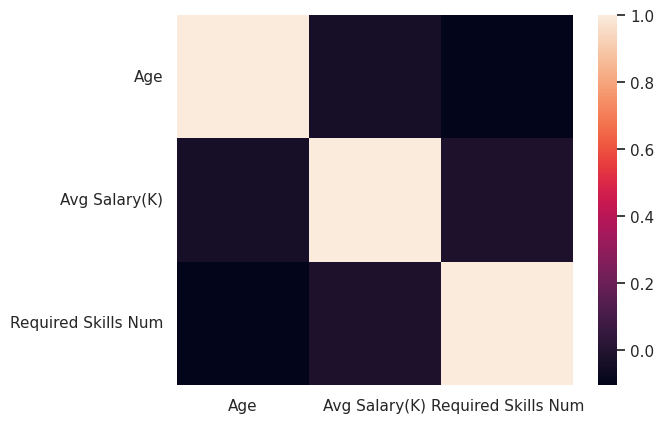

In [ ]:
plt.yticks(rotation=45)
sns.heatmap(df_q13.iloc[:, 1:].corr())
plt.show()

<Axes: xlabel='Required Skills Num', ylabel='Age'>

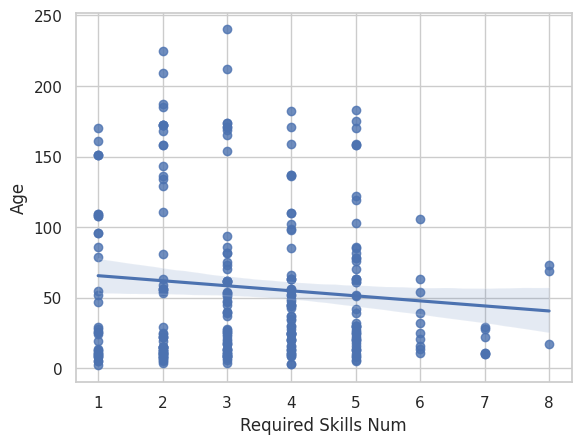

In [ ]:

sns.set_style("whitegrid")
sns.regplot(x='Required Skills Num' ,y='Age' ,data=df_q13)

<Axes: xlabel='Required Skills Num', ylabel='Age'>

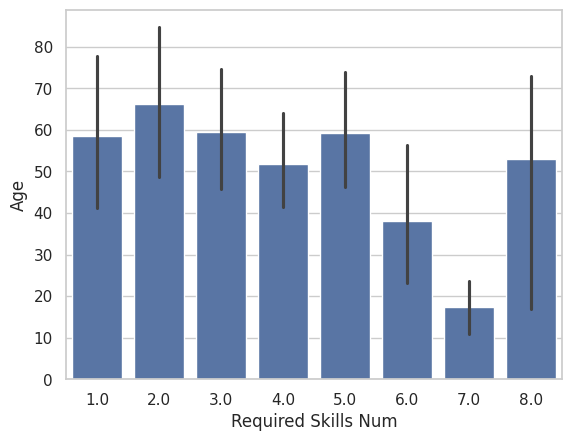

In [ ]:
sns.barplot(x='Required Skills Num' ,y='Age' ,data=df_q13)

the older a company the less skills they ask for

<Axes: xlabel='Required Skills Num', ylabel='Age'>

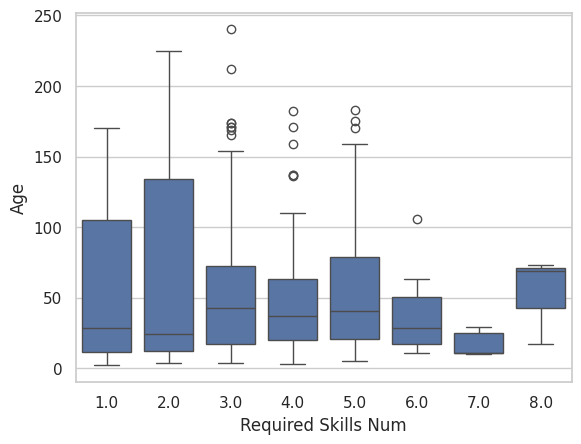

In [ ]:
sns.boxplot(x='Required Skills Num' ,y='Age' ,data=df_q13)

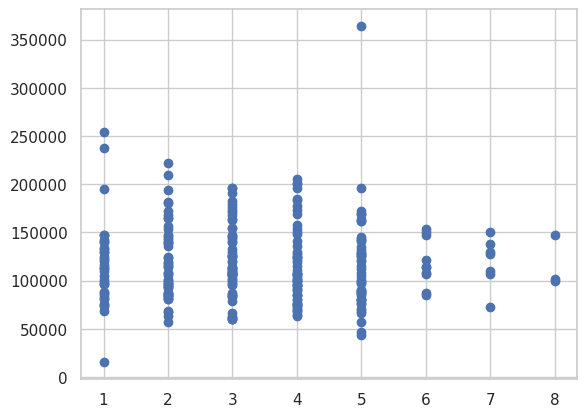

In [ ]:
plt.scatter(y='Avg Salary(K)' ,x='Required Skills Num' ,data=df_q13)

<Axes: xlabel='Required Skills Num', ylabel='Avg Salary(K)'>

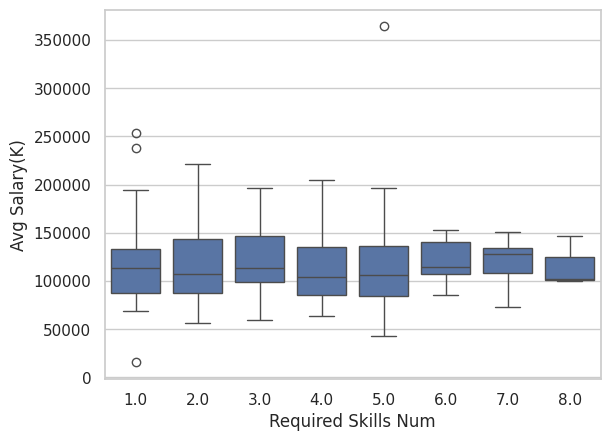

In [ ]:
sns.boxplot(y='Avg Salary(K)' ,x='Required Skills Num' ,data=df_q13)

<Axes: xlabel='Required Skills Num', ylabel='Avg Salary(K)'>

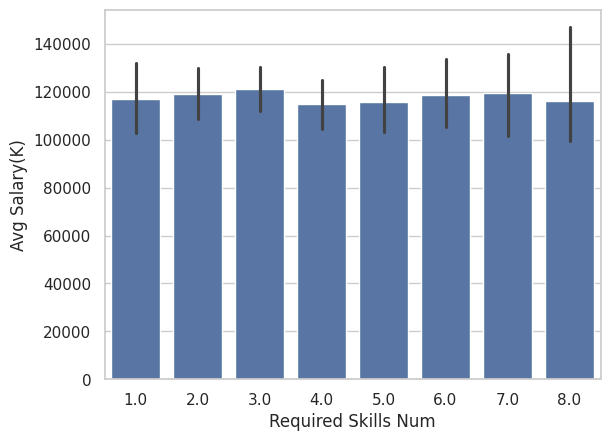

In [ ]:
sns.barplot(y='Avg Salary(K)' ,x='Required Skills Num' ,data=df_q13)

number of required skills doesn't decide the amount of salary

<Axes: xlabel='Age', ylabel='Avg Salary(K)'>

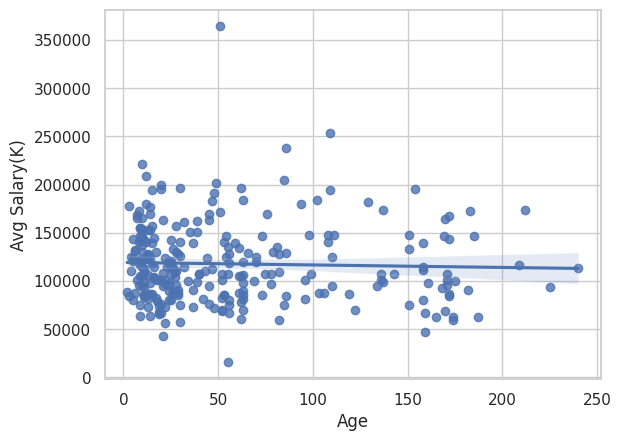

In [ ]:
sns.set_style("whitegrid")
sns.regplot(y='Avg Salary(K)' ,x='Age' ,data=df_q13)

In [ ]:
df['Age'].describe()

count    1552.000000
mean       66.285438
std        62.570165
min         1.000000
25%        21.000000
50%        45.000000
75%        98.250000
max       399.000000
Name: Age, dtype: float64

In [ ]:
df['Avg Salary(K)'].describe()

count      1557.000000
mean     102742.453436
std       41627.373087
min        3500.000000
25%       78000.000000
50%       95500.000000
75%      117000.000000
max      364000.000000
Name: Avg Salary(K), dtype: float64

# Sameh218767 Work

<h2> Answering Q11</h2>

**Q 11 : Can company ratings across specific locations reveal a consumer preference of certain ownership structures?**

To first answer this question, we must first answer:

*   **Q 11.1: What are the most popular ownership type across different locations ?**
*   **Q 11.2: What is the average rating in each location ?**

#### Columns used: (Job State Location, Rating, Type of ownership, Industry )



---

To begin the analysis, we have to first standardize the naming convention and remove impurities such as misplaced data or states written with in different forms

In [ ]:

state_map = {
    'NM': 'NM', 'MD': 'MD', 'FL': 'FL', 'WA': 'WA', 'NY': 'NY', 'TX': 'TX', 'CA': 'CA',
    'VA': 'VA', 'MA': 'MA', 'NJ': 'NJ', 'CO': 'CO', 'IL': 'IL', 'KY': 'KY', 'OR': 'OR',
    'CT': 'CT', 'MI': 'MI', 'OH': 'OH', 'AL': 'AL', 'MO': 'MO', 'PA': 'PA', 'GA': 'GA',
    'IN': 'IN', 'LA': 'LA', 'WI': 'WI', 'DC': 'DC', 'NC': 'NC', 'AZ': 'AZ', 'NE': 'NE',
    'MN': 'MN', 'TN': 'TN', 'DE': 'DE', 'UT': 'UT', 'ID': 'ID', 'RI': 'RI', 'IA': 'IA',
    'SC': 'SC', 'KS': 'KS',
    'United States': 'US',
    'Maryland': 'MD',
    'Minnesota': 'MN',
    'Arizona': 'AZ',
    'Georgia':'GA',
    'Oregon':'OR',
    'Alaska': 'AK',
    'Kentucky': 'KY',
    'Manhattan': 'NY',
    'Oahu Island': 'HI',
    'Dauphin, PA': 'PA',
    'Long Island-Queens': 'NY',
    'California':'CA',
    'New Jersey':'NJ',
    'Florida':'FL',
    'Massachusetts':'MA',
    'North Carolina':'NC',
    'Tennessee':'TN',
    'Hawaii':'HI',
    'Texas':'TX',
    'Virginia':'VA',
    'Pennsylvania':'PA',
    'Wisconsin':'WI',
    'Ohio':'OH',
    'Kansas':'KS'


}

# Standardize state names using a dictionary
df['Job State Location'] = df['Job State Location'].replace(state_map)
df = df[df['Job State Location'] != 'Ceará']

In [ ]:
df['Job State Location'].unique()


array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'OR', 'CT', 'MI', 'OH', 'AL', 'MO', 'PA', 'GA', 'IN',
       'LA', 'WI', 'DC', 'NC', 'AZ', 'NE', 'MN', 'TN', 'DE', 'UT', 'ID',
       'RI', 'IA', 'SC', 'KS', 'US', 'Remote', 'AK', 'AR', 'OK', 'SD',
       'NV', 'MS', 'HI', 'VT', 'MT', 'NH', 'PR', 'ME'], dtype=object)

In [ ]:
company_df = df

# Q 11.1: What are the most popular ownership type across different locations ?

We then proceed to group by the company types by the state locations, getting the popular type at each location and number of private and public companies in each state to answer the first sub question:

In [ ]:

# Group data by location and ownership type and count occurrences
df_ownership_type_by_state = company_df.groupby(['Job State Location', 'Type of ownership'])['Type of ownership'].count().unstack(fill_value=0)

# Get the total company count for each state
total_company_count = df_ownership_type_by_state.sum(axis=1)

# Get most popular ownership style in each state
most_popular_type_by_state = df_ownership_type_by_state.idxmax(axis=1)

# Count public and private companies for each state
public_company_count = df_ownership_type_by_state.get('Company - Public')
private_company_count = df_ownership_type_by_state.get('Company - Private')


result_df = pd.DataFrame({'Popular Company Type': most_popular_type_by_state,
                           'Total Company Count': total_company_count,
                          'Public Company Count': public_company_count,
                           'Private Company Count': private_company_count})

result_df = result_df.sort_values(by='Total Company Count', ascending=False)
result_df.head(10)


,Popular Company Type,Total Company Count,Public Company Count,Private Company Count
Job State Location,,,,
CA,Company - Public,240,101,86
TX,Company - Public,138,51,46
Remote,Company - Private,107,27,73
MA,Company - Public,104,43,39
VA,Company - Private,101,37,46
NY,Company - Private,99,35,37
US,Company - Public,93,31,30
FL,Company - Private,72,26,26
MD,Company - Private,69,14,35


# Visualize the data

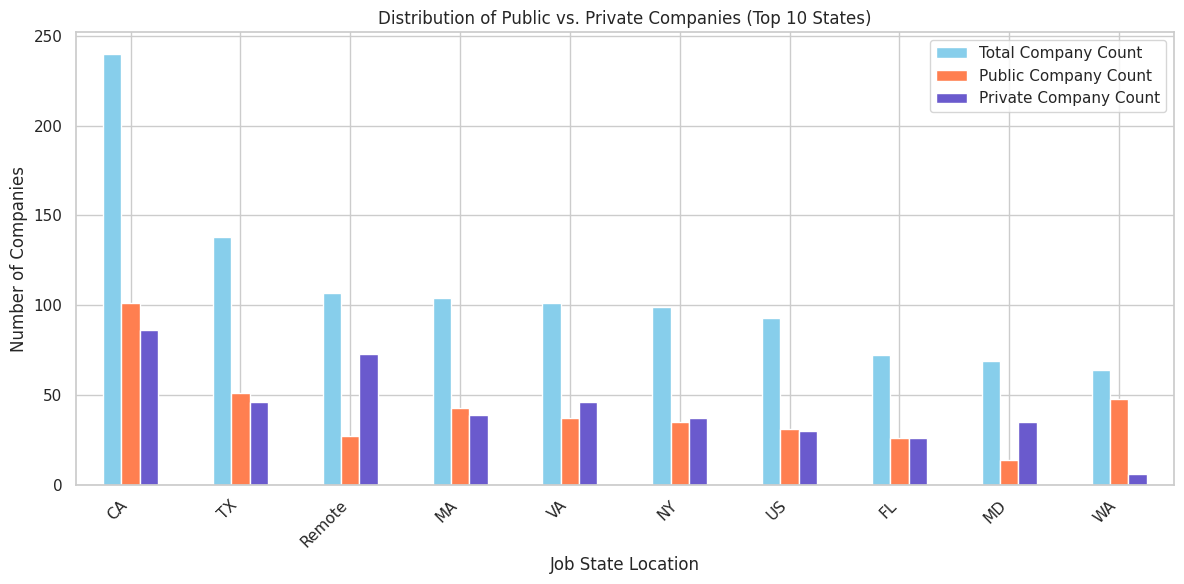

In [ ]:

top_10_states = result_df.head(10)

top_10_states.plot(kind='bar', stacked=False, color=['skyblue', 'coral','slateblue'], figsize=(12, 6))

plt.xlabel('Job State Location')
plt.ylabel('Number of Companies')
plt.title('Distribution of Public vs. Private Companies (Top 10 States)')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


This bar graph compares the number of public and private companies headquartered in the top 10 states. Separate bars for each state allow for easy comparison between the company types. This graph aims to visualize the difference in number of public, private and total company count in each state and how that would affect later analysis.

One last thing before proceeding, since the sample sizes for most of the locations is not that great, we need to drop states with less than 100 companies to narrow it down to good enough data to do analysis with

In [ ]:
result_df = result_df[result_df['Total Company Count'] >= 60]
result_df.head(10)

,Popular Company Type,Total Company Count,Public Company Count,Private Company Count
Job State Location,,,,
CA,Company - Public,240,101,86
TX,Company - Public,138,51,46
Remote,Company - Private,107,27,73
MA,Company - Public,104,43,39
VA,Company - Private,101,37,46
NY,Company - Private,99,35,37
US,Company - Public,93,31,30
FL,Company - Private,72,26,26
MD,Company - Private,69,14,35


Beginning with the second sub question, we find the average rating across all states to set a baseline of comparison later on

In [ ]:
# Calculate average rating and company count
average_rating_by_location = company_df.groupby('Job State Location')['Rating'].mean()
rating_df = pd.DataFrame({'Average Rating (All)': average_rating_by_location})
last_sorted_df = rating_df.sort_values(by='Average Rating (All)', ascending=False)

last_sorted_df

,Average Rating (All)
Job State Location,
ID,4.250000
NH,4.166667
AK,4.000000
VT,4.000000
MS,4.000000
AL,3.953846
NM,3.950000
IN,3.923077
MT,3.900000


We find the average rating again, but more specifically targeting public and private company types since they appeared to dominate in the previous question

In [ ]:
# Calculate average rating for public companies at each state
public_df = company_df[company_df['Type of ownership'] == 'Company - Public'].groupby('Job State Location')['Rating'].mean().reset_index()
public_df.columns = ['Job State Location', 'Average Rating (Public)']

# Calculate average rating for private companies at each state
private_df = company_df[company_df['Type of ownership'] == 'Company - Private'].groupby('Job State Location')['Rating'].mean().reset_index()
private_df.columns = ['Job State Location', 'Average Rating (Private)']
private_df.head(10)

,Job State Location,Average Rating (Private)
0,AL,4.012500
1,AZ,3.866667
2,CA,3.875581
3,CO,3.600000
4,CT,4.000000
5,DC,3.772222
6,DE,3.400000
7,FL,3.872000
8,GA,3.641176
9,HI,3.700000


# Q 11.2: What is the average rating in each location ?


We finally merge all the findings into one dataframe to get the following answer

In [ ]:
merged_df = pd.merge(public_df, private_df, on='Job State Location', how='outer')
final_merged_df = pd.merge(merged_df, last_sorted_df, on='Job State Location', how='right')

# Visualize Rating Comparison

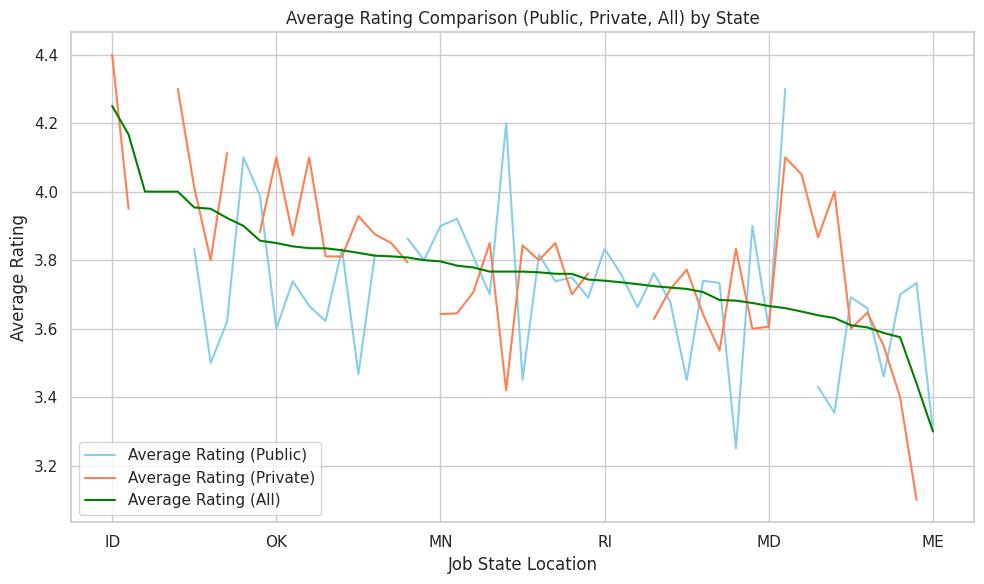

In [ ]:

final_merged_df.plot(kind='line', x='Job State Location', y=['Average Rating (Public)', 'Average Rating (Private)', 'Average Rating (All)'],
                     figsize=(10, 6), color=['skyblue', 'coral', 'green'])

plt.xlabel('Job State Location')
plt.ylabel('Average Rating')
plt.title('Average Rating Comparison (Public, Private, All) by State')


plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


This graph simply illustrates the average rating for private, public and overall rating for companies across diffeent states. The purpose of this is to illustrate if there is a difference in the ratings and how that will impact future conclusion on the matter.

Merge all previous dataframes to piece the bigger picture

In [ ]:
final_merged_df = pd.merge(result_df, final_merged_df, on='Job State Location', how='left')
final_merged_df

,Job State Location,Popular Company Type,Total Company Count,Public Company Count,Private Company Count,Average Rating (Public),Average Rating (Private),Average Rating (All)
0,CA,Company - Public,240,101,86,3.815152,3.875581,3.813115
1,TX,Company - Public,138,51,46,3.690000,3.761364,3.743478
2,Remote,Company - Private,107,27,73,3.677778,3.715278,3.720000
3,MA,Company - Public,104,43,39,3.761905,3.628205,3.724038
4,VA,Company - Private,101,37,46,3.988571,3.881818,3.857000
5,NY,Company - Private,99,35,37,3.758824,3.813514,3.735354
6,US,Company - Public,93,31,30,3.816129,3.800000,3.764516
7,FL,Company - Private,72,26,26,3.738462,3.872000,3.840278
8,MD,Company - Private,69,14,35,3.600000,3.605714,3.666176
9,WA,Company - Public,64,48,6,3.738298,3.850000,3.760317


We get the most popular sector within each state for further elaboration on why certain type of company structures may or may not be more popular

In [ ]:
df_ownership_type_by_state = company_df.groupby(['Job State Location', 'Sector'])['Sector'].count().unstack()

industry_result_df = df_ownership_type_by_state.apply(pd.Series.idxmax, axis=1).to_frame(name='Most Popular Sector')
industry_result_df['Sector Count'] = df_ownership_type_by_state.max(axis=1)
industry_result_df.head()



,Most Popular Sector,Sector Count
Job State Location,,
AK,Pharmaceutical & Biotechnology,1.0
AL,Aerospace & Defense,5.0
AR,Retail & Wholesale,5.0
AZ,Information Technology,6.0
CA,Information Technology,91.0


# Q 11: Can company ratings across specific locations reveal a consumer preference of certain ownership structures?

In [ ]:
final_merged_df = pd.merge(industry_result_df, final_merged_df, on='Job State Location', how='right')
final_merged_df

,Job State Location,Most Popular Sector,Sector Count,Popular Company Type,Total Company Count,Public Company Count,Private Company Count,Average Rating (Public),Average Rating (Private),Average Rating (All)
0,CA,Information Technology,91.0,Company - Public,240,101,86,3.815152,3.875581,3.813115
1,TX,Information Technology,23.0,Company - Public,138,51,46,3.690000,3.761364,3.743478
2,Remote,Information Technology,37.0,Company - Private,107,27,73,3.677778,3.715278,3.720000
3,MA,Biotech & Pharmaceuticals,27.0,Company - Public,104,43,39,3.761905,3.628205,3.724038
4,VA,Information Technology,24.0,Company - Private,101,37,46,3.988571,3.881818,3.857000
5,NY,Information Technology,16.0,Company - Private,99,35,37,3.758824,3.813514,3.735354
6,US,Information Technology,15.0,Company - Public,93,31,30,3.816129,3.800000,3.764516
7,FL,Healthcare,12.0,Company - Private,72,26,26,3.738462,3.872000,3.840278
8,MD,Information Technology,15.0,Company - Private,69,14,35,3.600000,3.605714,3.666176
9,WA,Information Technology,39.0,Company - Public,64,48,6,3.738298,3.850000,3.760317


# Visualize Average Public Rating and Total Count

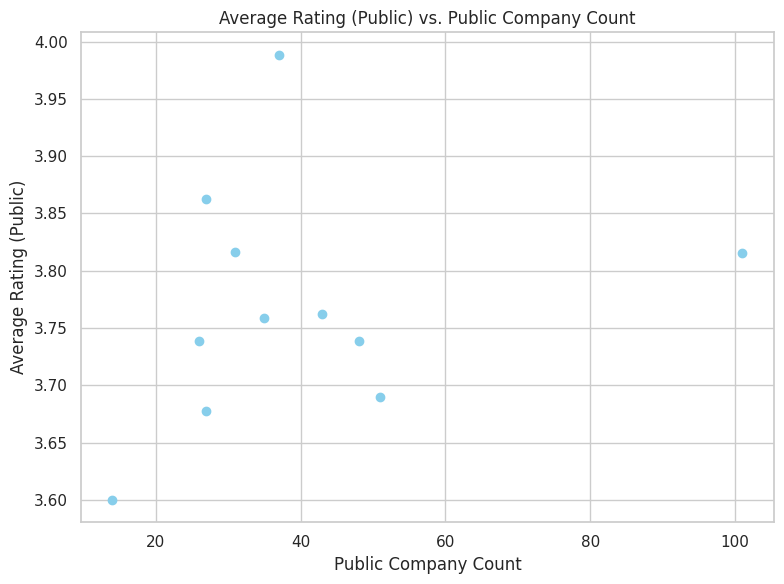

In [ ]:

company_type = 'Public'
rating_column = 'Average Rating (' + company_type + ')'
company_count_column = company_type + ' Company Count'


plt.figure(figsize=(8, 6))
plt.scatter(final_merged_df[company_count_column], final_merged_df[rating_column], color='skyblue')


plt.xlabel(company_count_column)
plt.ylabel(rating_column)
plt.title(f'Average Rating ({company_type}) vs. {company_count_column}')


plt.grid(True)
plt.tight_layout()
plt.show()


The scatter plot is that of the company count (public) and its average rating. It aims to see if there is a visual trend that emerges in locations with nummber of certain company type and ther average overall rating. This could be used to indicate an overall satisfaction that support the high number of certain company type found.

# Visualize Distribution of Public and Private Companies for Each State

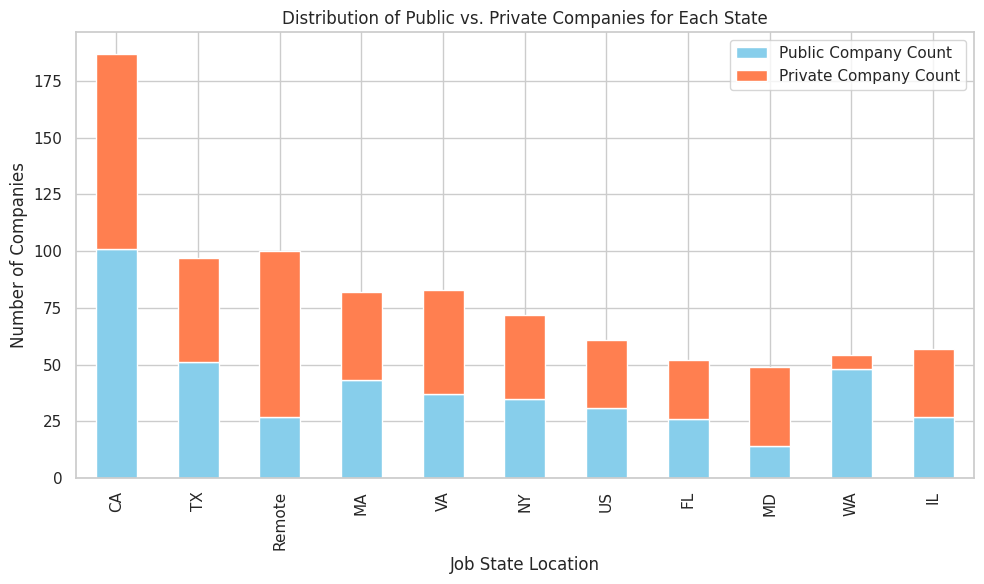

In [ ]:
final_merged_df.plot(kind='bar', stacked=True, x='Job State Location',
                      y=['Public Company Count', 'Private Company Count'], figsize=(10, 6), color=['skyblue', 'coral'])

plt.xlabel('Job State Location')
plt.ylabel('Number of Companies')
plt.title('Distribution of Public vs. Private Companies for Each State')

plt.tight_layout()
plt.show()


Similar to the graph above, this bar chart simply aims to compare the number of public and private companies headquartered in the top 10 states but in a stacked form to draw the last conclusions.

**Key Metrics:**

*   California and Texas have more public companies advertising their jobs compared to private companies, and yet, there seems to be higher overall rating for private companies.
*   Massachusetts, who is the only state to have a sector that is not Information Technology, has a relatively higher rating for public companies. This may or may not indicate that there might be better public companies in said sector that are causing this anomoly.

**Answer**

The data shows some variation in the average rating difference between public and private companies across locations. For example, in Virginia, consumers tend to rate public companies higher than private companies by an average of 0.106753, while in California, the opposite seems to be true, with private companies having a slight edge.

However, it's valid to note that such differences are too miniscule to consider anything significant. As such, it's difficult to make a correlation between company ratings across specific locationsand consumer preference of certain ownership structures.

<h2> Answering Q12</h2>

**Q 12: Is there a correlation between a company's size, revenue, and the average salary it offers?**


#### Columns used: (Lower Revenue, Upper Revenue, Avg Salary(K), Lower Size, Upper Size )


In [ ]:
revenue_df = df

We will begin by first preapring the data to deal with missing values or inconsistencies in formatting

In [ ]:
revenue_df['Lower Revenue'] = revenue_df['Lower Revenue'].fillna(0)
revenue_df['Upper Revenue'] = revenue_df['Upper Revenue'].fillna(0)
revenue_df['Lower Size'] = revenue_df['Lower Size'].fillna(0)
revenue_df['Upper Size'] = revenue_df['Upper Size'].fillna(0)
revenue_df[['Lower Revenue', 'Upper Revenue']] = revenue_df[['Lower Revenue', 'Upper Revenue']].astype(int)
revenue_df[['Lower Size', 'Upper Size']] = revenue_df[['Lower Size', 'Upper Size']].astype(int)

# Visualize Distribution for Upper and Lower Revenues

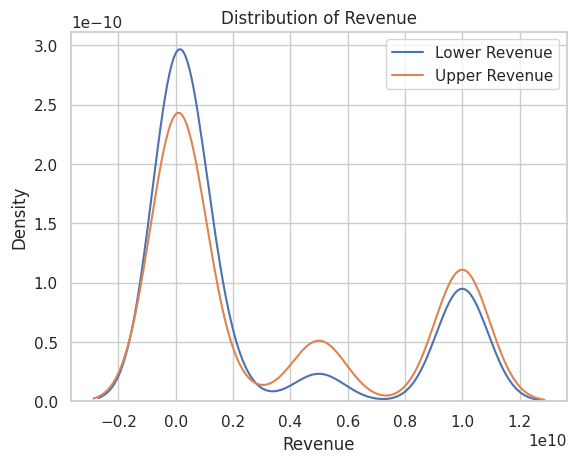

In [ ]:
sns.kdeplot(revenue_df['Lower Revenue'], label='Lower Revenue')
sns.kdeplot(revenue_df['Upper Revenue'], label='Upper Revenue')
plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Density")
plt.legend()
plt.show()

From observation, it looks like the data represents a classical case of positive skew, since most of the data points are concentrated towards the lower revenue values and the tail extends towards higher revenue values.
This simply means there are more companies with lower revenue and a few with significantly higher revenue, as such, we need to deal with the skewing before proceeding by using log transformation.

In [ ]:
revenue_df['Log Lower Revenue'] = np.log1p(revenue_df['Lower Revenue'])
revenue_df['Log Upper Revenue'] = np.log1p(revenue_df['Upper Revenue'])

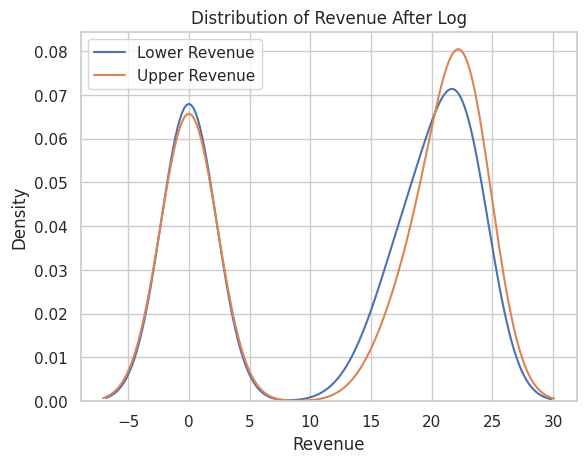

In [ ]:
sns.kdeplot(revenue_df['Log Lower Revenue'], label='Lower Revenue')
sns.kdeplot(revenue_df['Log Upper Revenue'], label='Upper Revenue')
plt.title("Distribution of Revenue After Log")
plt.xlabel("Revenue")
plt.ylabel("Density")
plt.legend()
plt.show()

However, due to the unnatural visualization after normalizatin, we will proceed with the revenue columns as is.

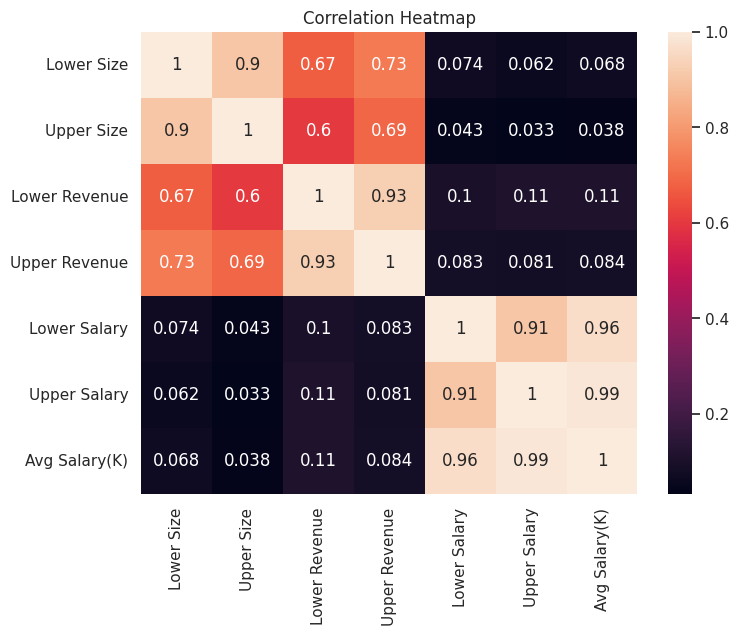

In [ ]:
corr = revenue_df[['Lower Size','Upper Size', 'Lower Revenue','Upper Revenue','Lower Salary','Upper Salary', 'Avg Salary(K)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()

**Key Metrics:**

*   With the obvious strong positive correlation between the different salary columns, Avg Salary(K) tended to have weak negative correlation with company size. This may indicate that a company slightly tends to have lower wages regardless of size.
*   On the contrary, there is a strong positive correlation between revenue and the size of the company, especially 'upper revenue' and 'lower size' columns. This indicates as revenue grows, some companies choose to remain small in terms of headcount while other prefer to expand. It also shows that since both lower and larger sizes have strong correlation regardless, revenue is not specifically tied to high employee count.



**Answer**

Although salary columns almost all have weak correlation with both revenue and and company headcount, the data revealed that there is a high correlation between headcount and revenue, which suggests that there is strong correlation between a company's size and revenue but not the average salary it can offer.


----

# Hypothesis Testing

#### Does company age affect salary?

#### - H0 it does not
####  - H1 it does

In [ ]:
from scipy import stats

test_df = df[['Rating', 'Avg Salary(K)']].dropna()

correlation = test_df['Rating'].corr(test_df['Avg Salary(K)'])
print("Correlation coefficient between Age and Avg Salary(K):", correlation)

t_value, p_value = stats.ttest_ind(test_df['Rating'], test_df['Avg Salary(K)'])

print("T-value:", t_value)
print("p-value:", p_value)

if p_value < 0.05:
  print("H1 it does")
else:
  print("H0 it does not")

Correlation coefficient between Age and Avg Salary(K): 0.08545006502751262
T-value: -97.38663438144167
p-value: 0.0
H1 it does


#### Is there a relationship between a company's industry and its average salary?

#### H0 the is no relationship
#### H1 there is a relationship

In [ ]:
test_df = df[['Industry', 'Avg Salary(K)']].dropna()

contingency_table = pd.crosstab(test_df['Industry'], pd.cut(test_df['Avg Salary(K)'], bins=[0, 50000, 100000, float('inf')]), margins=False)

chi2_statistic, p_value, degrees_of_freedom, expected_table = stats.chi2_contingency(contingency_table)

print("Chi Square (Observed statistic)", chi2_statistic)
print("p-value:", p_value)
print("Degrees of Freedom:", degrees_of_freedom)

if p_value < 0.05:
  print("H1 there is a relationship")
else:
  print("H0 the is no relationship")

Chi Square (Observed statistic) 348.17830786645277
p-value: 1.1830194925977712e-06
Degrees of Freedom: 232
H1 there is a relationship
